# Musical Ambiguous Figures Visualizations and Analysis

**Author:** Sarah Gates

**Contact:** sarahgates22@gmail.com

[Github](https://github.com/Saz2049) <br>
[LinkedIn](https://www.linkedin.com/in/sarah-gates-/)

**Date:** Summer 2022


## Introduction

## Table of Contents

1. [Data Loading](#1.-Data-Loading)
2. [Exploratory Analysis: DV1](#2.-Exploratory-Analysis:-DV1)
    * [a. Outliers](#a.-Outliers)
    * [b. Data Summaries and Pivot Tables](#b.-Data-Summaries-and-Pivot-Tables) 
        * [i. Main Effects](#i.-Main-Effects)
        * [ii. Two-Way Interactions](#ii.-Two-Way-Interactions)
        * [iii. Effects of Order](#iii.-Effects-of-Order)
3. [Exploratory Analysis: DV2](#3.-Exploratory-Analysis:-DV2-(ease-of-change))
    * [a. Outliers](#a.-Outliers)
    * [b. Data Summaries and Pivot Tables](#b.-Data-Summaries-and-Pivot-Tables)
        * [i. Main Effects](#ii.-Two-Way-Interactions) 
        * [ii. Two-Way Interactions](#ii.-Two-Way-Interactions)
        * [iii. Effects of Order](#iii.-Effects-of-Order)
4. [Visualizations for RM ANOVA: DV1](#4.-Visualizations-for-RM-ANOVA:-DV1)
    * a. Main Effects
    * b. Interaction Effects
5. Visualization for RM NOVA: DV2
    * a. Main Effects
    * b. Interaction Effects
6. Biographical and Summary Statistics
7. Familiarity Analysis 

Loading the required libraries:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import plotly.express as px
from pylab import rcParams

##  1. Data Loading

In [4]:
df1 = pd.read_csv('data/amb_DV1_fin.csv') # loading the dataset without the outlier

In [5]:
df1.head(5)

,Unnamed: 0,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
0,0,913,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Completely unfamiliar,...,Expert,2,5,1,1,2,3,1,1,2
1,1,834,Exposition,Bass,Romanesca,5.1,Graduate Student,5-10 years,5-10 years,Familiar,...,Intermediate,1,3,2,2,2,1,2,2,1
2,2,719,Exposition,Bass,Romanesca,6.5,Graduate Student,1-2 years,3-5 years,Somewhat familiar,...,Intermediate,2,3,2,2,1,6,2,1,1
3,3,862,Exposition,Bass,Romanesca,4.6,Graduate Student,5-10 years,5-10 years,Very familiar,...,Intermediate,1,3,1,1,1,3,1,2,2
4,4,686,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Very familiar,...,Expert,2,1,2,1,1,4,1,1,1


In [6]:
df_DV1_long = df1.set_index(keys='Unnamed: 0')

df_DV1_long.index.names = ['Index']

df_DV1_long

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
Index,,,,,,,,,,,,,,,,,,,,,
0,913,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,...,Expert,2,5,1,1,2,3,1,1,2
1,834,Exposition,Bass,Romanesca,5.1,Graduate Student,5-10 years,5-10 years,Familiar,This was the first time I have heard this,...,Intermediate,1,3,2,2,2,1,2,2,1
2,719,Exposition,Bass,Romanesca,6.5,Graduate Student,1-2 years,3-5 years,Somewhat familiar,I have heard this before,...,Intermediate,2,3,2,2,1,6,2,1,1
3,862,Exposition,Bass,Romanesca,4.6,Graduate Student,5-10 years,5-10 years,Very familiar,This was the first time I have heard this,...,Intermediate,1,3,1,1,1,3,1,2,2
4,686,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Very familiar,This was the first time I have heard this,...,Expert,2,1,2,1,1,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,244,Recapitulation,Schema,Prinner,7.0,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,1,2,1,1,2,2,2,1
16,148,Recapitulation,Schema,Prinner,6.0,Professor,10 + years,10 + years,Somewhat familiar,I have heard this before,...,Intermediate,1,5,2,1,1,4,1,1,1
17,701,Recapitulation,Schema,Prinner,7.0,Graduate Student,10 + years,10 + years,Very familiar,I have heard this before,...,Intermediate,2,3,1,2,2,6,1,2,2


In [7]:
df_DV1_long.describe()

,Random_IDs,DV,Solfege_Hearing,Schema_Hearing,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,591.210526,4.690789,6.068421,4.505263,1.631579,3.105263,1.473684,1.473684,1.421053,3.526316,1.526316,1.421053,1.526316
std,255.110358,2.208145,0.942423,2.042148,0.483438,1.777829,0.500406,0.500406,0.494814,1.605116,0.500406,0.494814,0.500406
min,148.000000,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,381.000000,3.000000,5.500000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,540.000000,5.250000,6.100000,4.900000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,862.000000,6.525000,7.000000,6.700000,2.000000,5.000000,2.000000,2.000000,2.000000,5.000000,2.000000,2.000000,2.000000
max,998.000000,7.000000,7.000000,7.000000,2.000000,6.000000,2.000000,2.000000,2.000000,6.000000,2.000000,2.000000,2.000000


In [8]:
df_DV1_long.loc[18, :]

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
Index,,,,,,,,,,,,,,,,,,,,,
18,540,Exposition,Bass,Romanesca,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Exposition,Bass,Prinner,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Exposition,Soprano,Romanesca,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Exposition,Soprano,Prinner,5.3,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Exposition,Schema,Romanesca,4.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Exposition,Schema,Prinner,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Recapitulation,Bass,Romanesca,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Recapitulation,Bass,Prinner,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Recapitulation,Soprano,Romanesca,6.3,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2


In [9]:
df_DV1_long.Excerpt_Analysis.value_counts()

No, not at all    180
Yes, somewhat      48
Name: Excerpt_Analysis, dtype: int64

In [12]:
df2 = pd.read_csv('data/amb_DV2_fin.csv')

df_DV2_long = df2.set_index(keys='Unnamed: 0')

df_DV2_long.index.names = ['Index']

df_DV2_long.head(5)

,Random_IDs,Sonata_Section,Feature,DV2,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,Excerpt_Analysis,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
Index,,,,,,,,,,,,,,,,,,,,,
0,913,Exposition,Bass,0.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,"No, not at all",...,Expert,2,5,1,1,2,3,1,1,2
1,834,Exposition,Bass,0.0,Graduate Student,5-10 years,5-10 years,Familiar,This was the first time I have heard this,"No, not at all",...,Intermediate,1,3,2,2,2,1,2,2,1
2,719,Exposition,Bass,0.0,Graduate Student,1-2 years,3-5 years,Somewhat familiar,I have heard this before,"No, not at all",...,Intermediate,2,3,2,2,1,6,2,1,1
3,862,Exposition,Bass,0.0,Graduate Student,5-10 years,5-10 years,Very familiar,This was the first time I have heard this,"No, not at all",...,Intermediate,1,3,1,1,1,3,1,2,2
4,686,Exposition,Bass,0.0,Professor,10 + years,10 + years,Very familiar,This was the first time I have heard this,"No, not at all",...,Expert,2,1,2,1,1,4,1,1,1


In [13]:
df_DV1_long.columns

Index(['Random_IDs', 'Sonata_Section', 'Feature', 'Mod_Type', 'DV',
       'Education_Level', 'Years_Theory', 'Years_Skills', 'Schemata_Expertise',
       'Excerpt_Familiarity', 'Excerpt_Analysis', 'Solfege_Hearing',
       'Schema_Hearing', 'Perfect_Pitch?', 'Interpretation_App',
       'Expertise_Group', 'Expertise_Group_solf', 'Sonata_Order', 'Expo_Order',
       'Expo_Bass_Order', 'Expo_Sop_Order', 'Expo_Schema_Order', 'Recap_Order',
       'Recap_Bass_Order', 'Recap_Sop_Order', 'Recap_Schema_Order'],
      dtype='object')

In [15]:
df3 = pd.read_csv('data/amb_both_DVs_fin.csv')

df_Both_DVs = df3.set_index(keys='Unnamed: 0')

df_Both_DVs.index.names = ['Index']

df_Both_DVs.head(5)

,level_0,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,DV2,Education_Level,Years_Theory,Years_Skills,...,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order,Familiarity_Cat,Familiarity_Numeric,Expertise_Numeric,Analysis_Numeric
Index,,,,,,,,,,,,,,,,,,,,,
0,16,148,Exposition,Bass,Romanesca,7.0,0.0,Professor,10 + years,10 + years,...,1,1,4,1,1,1,Medium,2.0,2.0,1.0
1,36,148,Exposition,Bass,Prinner,7.0,0.0,Professor,10 + years,10 + years,...,1,1,4,1,1,1,Medium,2.0,2.0,1.0
2,96,148,Exposition,Schema,Romanesca,0.0,4.0,Professor,10 + years,10 + years,...,1,1,4,1,1,1,Medium,2.0,2.0,1.0
3,116,148,Exposition,Schema,Prinner,4.0,4.0,Professor,10 + years,10 + years,...,1,1,4,1,1,1,Medium,2.0,2.0,1.0
4,56,148,Exposition,Soprano,Romanesca,5.5,2.1,Professor,10 + years,10 + years,...,1,1,4,1,1,1,Medium,2.0,2.0,1.0


## 2. Exploratory Analysis: DV1

### a. Outliers

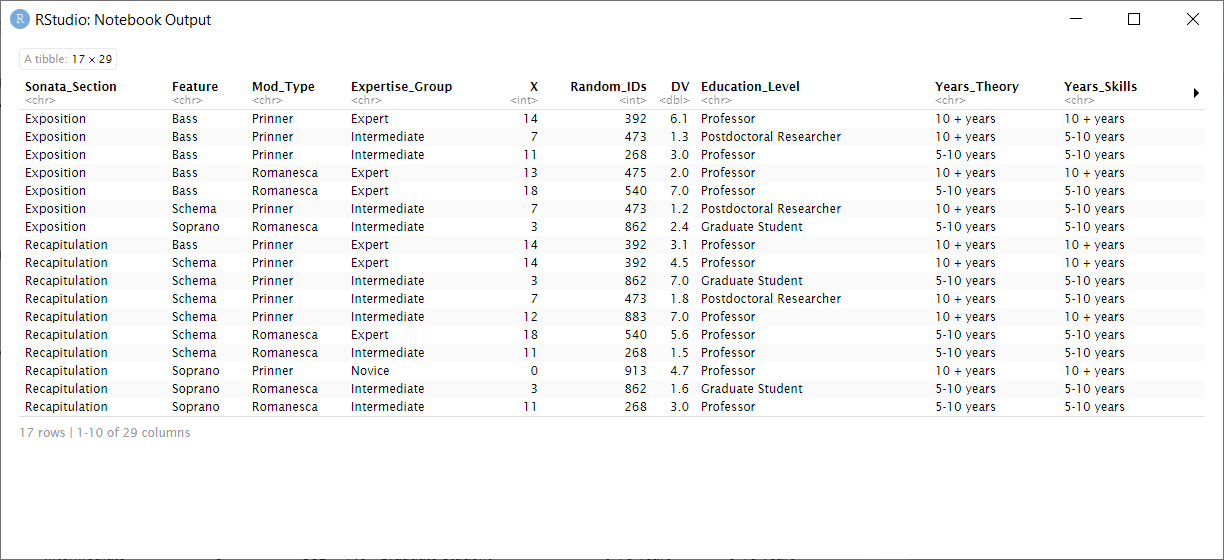

In [11]:
outliers = df_DV1_long.loc[[14, 7, 11, 13, 18, 3, 12, 0], :]

outliers

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
Index,,,,,,,,,,,,,,,,,,,,,
14,392,Exposition,Bass,Romanesca,5.0,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,1,1,1,2,2,1,1,2,2
14,392,Exposition,Bass,Prinner,6.1,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,1,1,1,2,2,1,1,2,2
14,392,Exposition,Soprano,Romanesca,5.3,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,1,1,1,2,2,1,1,2,2
14,392,Exposition,Soprano,Prinner,5.1,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,1,1,1,2,2,1,1,2,2
14,392,Exposition,Schema,Romanesca,4.4,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,1,1,1,2,2,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,913,Recapitulation,Bass,Prinner,7.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,...,Expert,2,5,1,1,2,3,1,1,2
0,913,Recapitulation,Soprano,Romanesca,1.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,...,Expert,2,5,1,1,2,3,1,1,2
0,913,Recapitulation,Soprano,Prinner,4.7,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,...,Expert,2,5,1,1,2,3,1,1,2


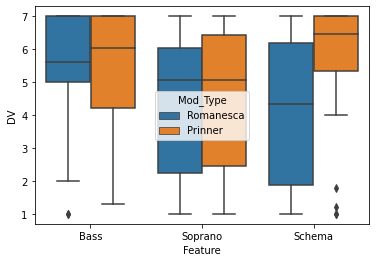

In [12]:
sns.boxplot(data=df_DV1_long, x='Feature', y='DV', hue='Mod_Type')
rcParams['figure.figsize'] = 10, 8

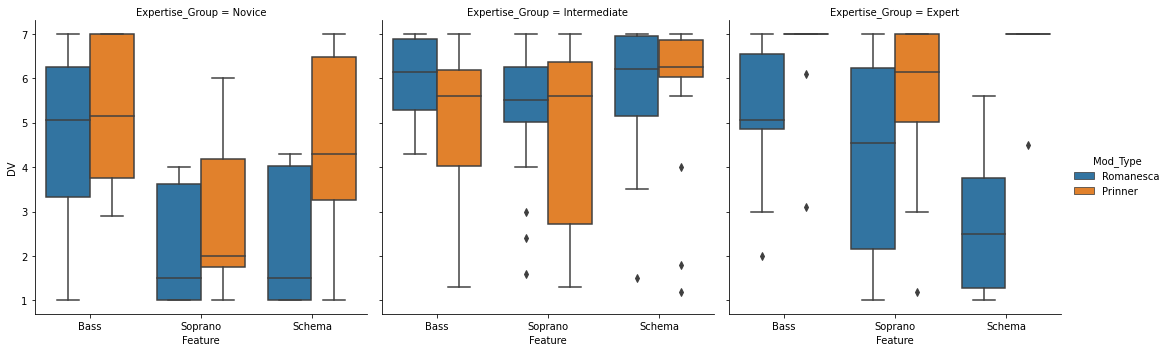

In [13]:
sns.catplot(data=df_DV1_long, x='Feature', y="DV", hue="Mod_Type", kind='box', col='Expertise_Group')

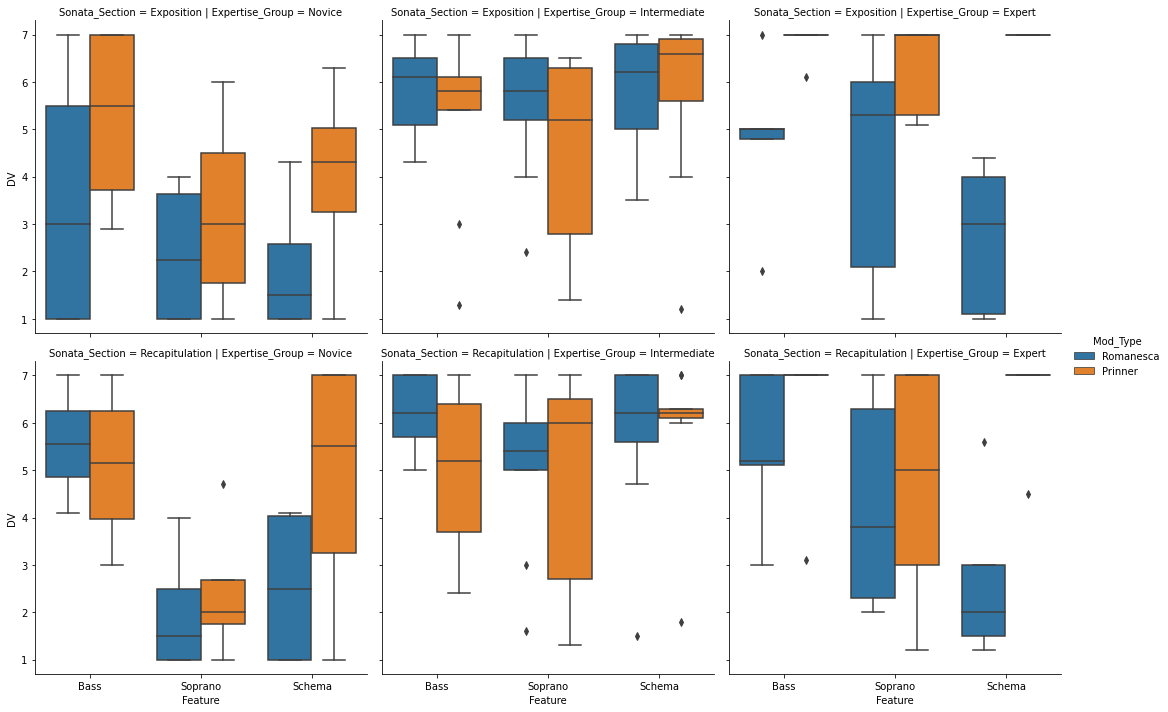

In [14]:
sns.catplot(data=df_DV1_long, x='Feature', y='DV', hue='Mod_Type', kind='box', col='Expertise_Group', row="Sonata_Section")
rcParams['figure.figsize'] = 10, 8

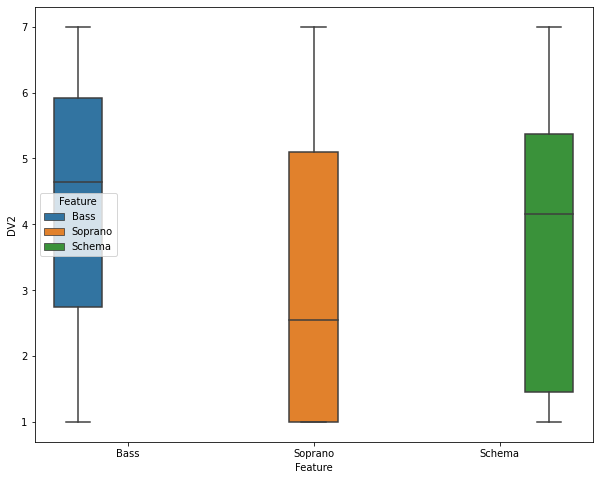

In [15]:
sns.boxplot(data=df_DV2_long, x='Feature', y='DV2', hue='Feature')
rcParams['figure.figsize'] = 10, 8

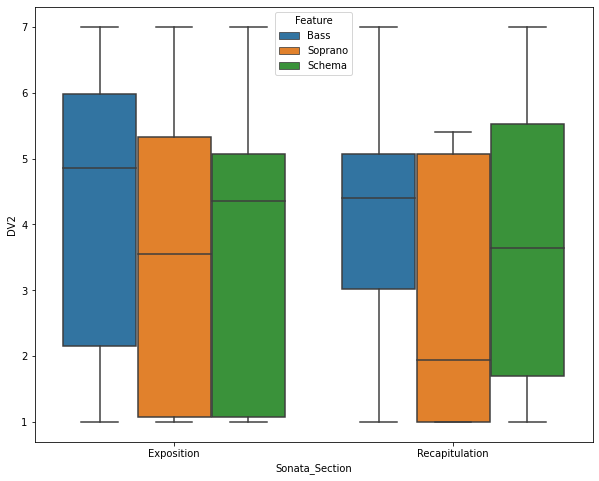

In [16]:
sns.boxplot(data=df_DV2_long, x='Sonata_Section', y='DV2', hue='Feature')
rcParams['figure.figsize'] = 10, 10

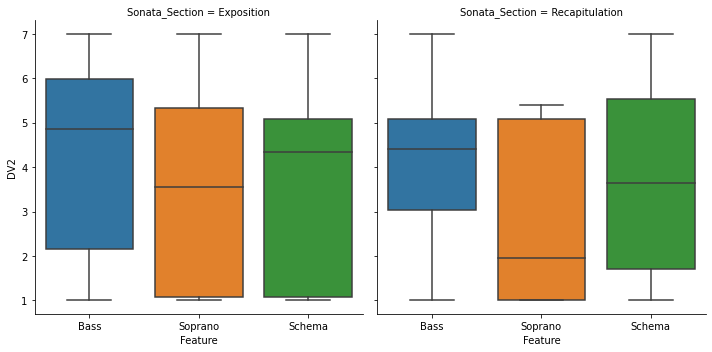

In [17]:
sns.catplot(data=df_DV2_long, x='Feature', y='DV2', kind='box', col='Sonata_Section')

### b. Data Summaries and Pivot Tables

In [18]:
df_DV1_long.describe()

,Random_IDs,DV,Solfege_Hearing,Schema_Hearing,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,596.555556,4.919907,6.072222,4.477778,1.611111,3.055556,1.500000,1.500000,1.444444,3.555556,1.500000,1.444444,1.555556
std,261.090783,2.046624,0.968224,2.094926,0.488630,1.813814,0.501161,0.501161,0.498058,1.644347,0.501161,0.498058,0.498058
min,148.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,381.000000,3.075000,5.500000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,613.000000,5.600000,6.150000,4.700000,2.000000,3.000000,1.500000,1.500000,1.000000,3.000000,1.500000,1.000000,2.000000
75%,862.000000,6.925000,7.000000,6.700000,2.000000,5.000000,2.000000,2.000000,2.000000,5.000000,2.000000,2.000000,2.000000
max,998.000000,7.000000,7.000000,7.000000,2.000000,6.000000,2.000000,2.000000,2.000000,6.000000,2.000000,2.000000,2.000000


##### i. Main Effects

Sonata Section

In [19]:
# No main effect of sonata section

Table_Sonata_Section_DV1 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Section'], values='DV',aggfunc=['mean','std'])

Table_Sonata_Section_DV1

,mean,std
,DV,DV
Sonata_Section,,
Exposition,4.939815,2.046969
Recapitulation,4.900000,2.055628


In [20]:
Plot_T1 = Table_Sonata_Section_DV1.reset_index(col_level=1)

Plot_T1.droplevel(0, axis=1)

Plot_T1.columns = ["Sonata Section", 'DV (Mean)', 'std']

Plot_T1

,Sonata Section,DV (Mean),std
0,Exposition,4.939815,2.046969
1,Recapitulation,4.900000,2.055628


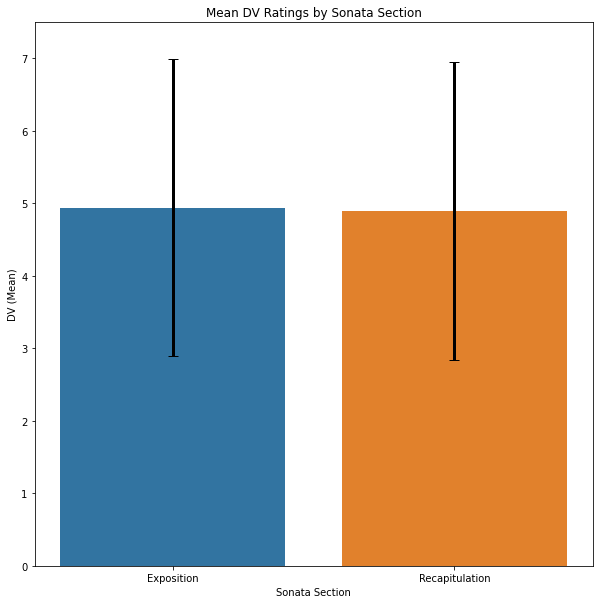

In [21]:
ax1 = sns.barplot(data=Plot_T1, x='Sonata Section', y='DV (Mean)')

plt.ylim(top=7.5)
rcParams['figure.figsize'] = 15, 8

ax1.errorbar(data=Plot_T1, x='Sonata Section', y='DV (Mean)', yerr='std', ls='', lw=3, color='black', capsize=5)
plt.title(label="Mean DV Ratings by Sonata Section")
plt.show()

Feature

In [22]:
#may be a main effect of feature, soprano interpretations are far more difficult

Table_Feature_DV1 =  pd.pivot_table(data=df_DV1_long, index=['Feature'], values='DV',aggfunc=['mean','std'])

Table_Feature_DV1

,mean,std
,DV,DV
Feature,,
Bass,5.458333,1.656039
Schema,4.945833,2.189214
Soprano,4.355556,2.128670


In [23]:
Plot_T2 = Table_Feature_DV1.reset_index(col_level=1)

Plot_T2.droplevel(0, axis=1)

Plot_T2.columns = ["Feature", 'DV (Mean)', 'std']

Plot_T2

,Feature,DV (Mean),std
0,Bass,5.458333,1.656039
1,Schema,4.945833,2.189214
2,Soprano,4.355556,2.128670


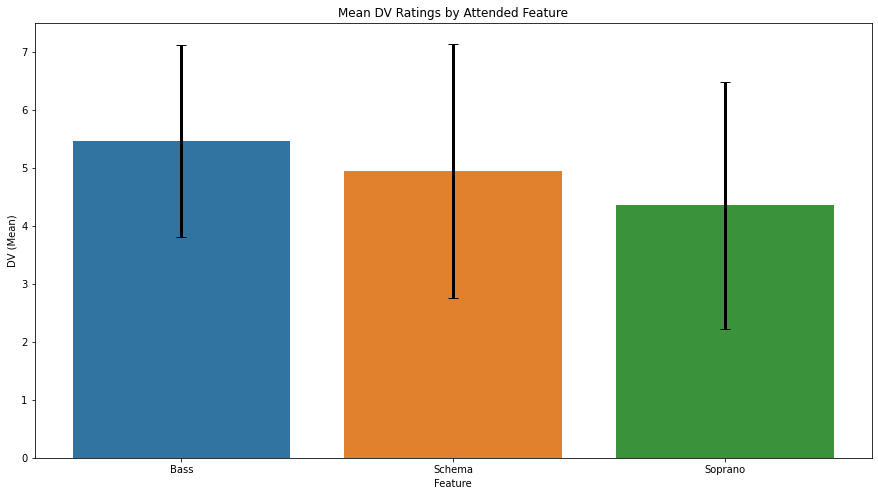

In [24]:
ax2 = sns.barplot(data=Plot_T2, x='Feature', y='DV (Mean)')

plt.ylim(top=7.5)
rcParams['figure.figsize'] = 15, 5

ax2.errorbar(data=Plot_T2, x='Feature', y='DV (Mean)', yerr='std', ls='', lw=3, color='black', capsize=5)
plt.title(label="Mean DV Ratings by Attended Feature")
plt.show()

Modulation Type

In [25]:
# Effect of mod type? Prinner easier to hear than Romanesca

Table_Schema_DV1 = pd.pivot_table(data=df_DV1_long, index=['Mod_Type'], values='DV',aggfunc=['mean','std'])

Table_Schema_DV1

,mean,std
,DV,DV
Mod_Type,,
Prinner,5.211111,1.995197
Romanesca,4.628704,2.065065


In [26]:
Plot_T3 = Table_Schema_DV1.reset_index(col_level=1)

Plot_T3.droplevel(0, axis=1)

Plot_T3.columns = ["Modulation Type", 'DV (Mean)', 'std']

Plot_T3

,Modulation Type,DV (Mean),std
0,Prinner,5.211111,1.995197
1,Romanesca,4.628704,2.065065


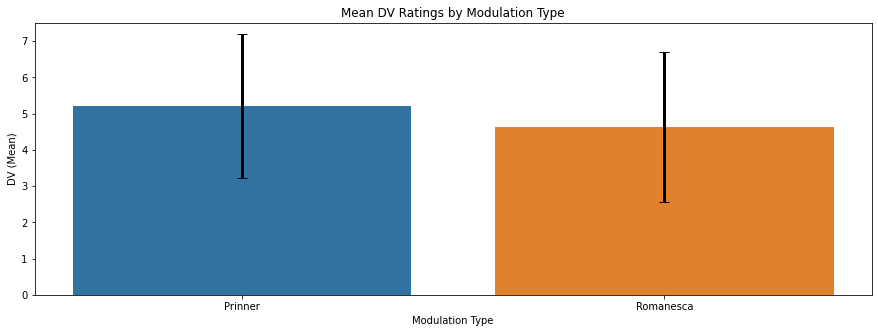

In [27]:

ax3 = sns.barplot(data=Plot_T3, x='Modulation Type', y='DV (Mean)')

plt.ylim(top=7.5)


ax3.errorbar(data=Plot_T3, x='Modulation Type', y='DV (Mean)', yerr='std', ls='', lw=3, color='black', capsize=5)
plt.title(label="Mean DV Ratings by Modulation Type")
plt.show()

Between Subject Factor: Expertise Group

In [28]:
Expertise_Table_DV1 = pd.pivot_table(data=df_DV1_long, index=['Expertise_Group'], values='DV',aggfunc=['mean','std'])

Expertise_Table_DV1

,mean,std
,DV,DV
Expertise_Group,,
Expert,5.133333,2.120015
Intermediate,5.405556,1.662496
Novice,3.560417,2.176933


##### ii. Two-Way Interactions

Sonata Section by Attended Feature

In [29]:
#Probably no two way interaction of Sonata_Section and Feature

Table_Sect_Feat_DV1 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Section','Feature'], values="DV", aggfunc=['mean','std'])

Table_Sect_Feat_DV1

mean       std
                              DV        DV
Sonata_Section Feature                    
Exposition     Bass     5.316667  1.826550
               Schema   4.916667  2.200974
               Soprano  4.586111  2.086577
Recapitulation Bass     5.600000  1.478416
               Schema   4.975000  2.208215
               Soprano  4.125000  2.174577

In [30]:
Plot_T4 = Table_Sect_Feat_DV1.reset_index(col_level=1)

Plot_T4.droplevel(0, axis=1)

Plot_T4.columns = ["Sonata Section", "Feature", 'DV (Mean)', 'std']

Plot_T4

,Sonata Section,Feature,DV (Mean),std
0,Exposition,Bass,5.316667,1.826550
1,Exposition,Schema,4.916667,2.200974
2,Exposition,Soprano,4.586111,2.086577
3,Recapitulation,Bass,5.600000,1.478416
4,Recapitulation,Schema,4.975000,2.208215
5,Recapitulation,Soprano,4.125000,2.174577


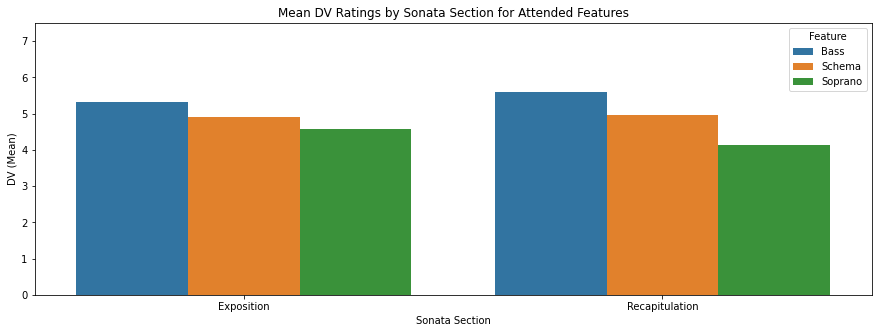

In [31]:
sd= Plot_T4.iloc[:, 3]

ax4 = sns.barplot(data=Plot_T4, x='Sonata Section', y='DV (Mean)', hue='Feature')

plt.ylim(top=7.5)

plt.title(label="Mean DV Ratings by Sonata Section for Attended Features")
plt.show()

In [32]:
try_this = Plot_T4.groupby(['Feature'])

# lvls = df_DV1_long.Feature.unique()

# ax4.errorbar(data=try_this, x='Sonata Section', y='DV (Mean)', yerr=sd, ls='', lw=3, color='black', capsize=5)


# for i in lvls:
#     ax4.errorbar(data=Plot_T4, x=(Plot_T4[Plot_T4['Feature']==i]["Sonata Section"]),
#                 y=(Plot_T4[Plot_T4['Feature']==i]["DV (Mean)"]), 
#                 yerr=(Plot_T4[Plot_T4['Feature']==i]["std"]), label=i, ls='', lw=3, color='black', capsize=5)

Sonata Section and Modulation Type

In [33]:
# No interaction of Sonata Section and Modulation Type

Table_Sect_Mod_DV1 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Section','Mod_Type'], values="DV", aggfunc=('mean', 'std'))

Table_Sect_Mod_DV1

mean       std
Sonata_Section Mod_Type                     
Exposition     Prinner    5.335185  1.931971
               Romanesca  4.544444  2.099566
Recapitulation Prinner    5.087037  2.067087
               Romanesca  4.712963  2.046170

In [34]:
Plot_T5 = Table_Sect_Mod_DV1.reset_index(col_level=1)


Plot_T5.columns = ["Sonata Section", "Modulation Type", 'DV (Mean)', 'std']

Plot_T5

,Sonata Section,Modulation Type,DV (Mean),std
0,Exposition,Prinner,5.335185,1.931971
1,Exposition,Romanesca,4.544444,2.099566
2,Recapitulation,Prinner,5.087037,2.067087
3,Recapitulation,Romanesca,4.712963,2.046170


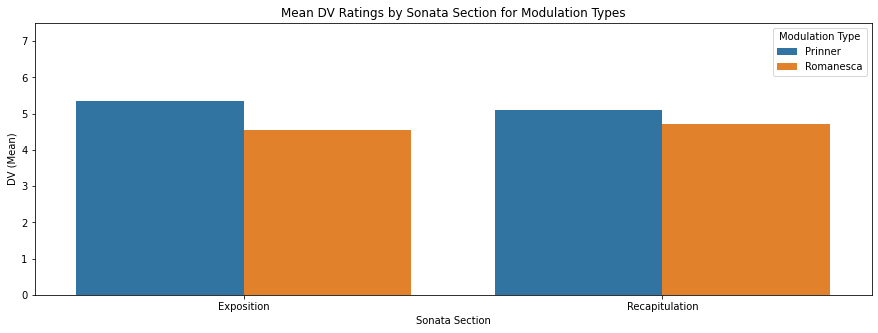

In [35]:
ax5 = sns.barplot(data=Plot_T5, x='Sonata Section', y='DV (Mean)', hue='Modulation Type')

plt.ylim(top=7.5)

plt.title(label="Mean DV Ratings by Sonata Section for Modulation Types")
plt.show()

Feature and Modulation Type

In [36]:
# May be a two-way interaction between feature and modulation type, bass and schema attending features have opposite trend

Table_Feat_Mod_DV1 = pd.pivot_table(data=df_DV1_long, index=['Feature', 'Mod_Type'], values="DV", aggfunc=['mean','std'])

Table_Feat_Mod_DV1

mean       std
                         DV        DV
Feature Mod_Type                     
Bass    Prinner    5.486111  1.712000
        Romanesca  5.430556  1.621960
Schema  Prinner    5.730556  1.862689
        Romanesca  4.161111  2.232907
Soprano Prinner    4.416667  2.182855
        Romanesca  4.294444  2.102236

In [37]:
Plot_T6 = Table_Feat_Mod_DV1.reset_index(col_level=1)


Plot_T6.columns = ["Feature", "Modulation Type", 'DV (Mean)', 'std']

Plot_T6

,Feature,Modulation Type,DV (Mean),std
0,Bass,Prinner,5.486111,1.712000
1,Bass,Romanesca,5.430556,1.621960
2,Schema,Prinner,5.730556,1.862689
3,Schema,Romanesca,4.161111,2.232907
4,Soprano,Prinner,4.416667,2.182855
5,Soprano,Romanesca,4.294444,2.102236


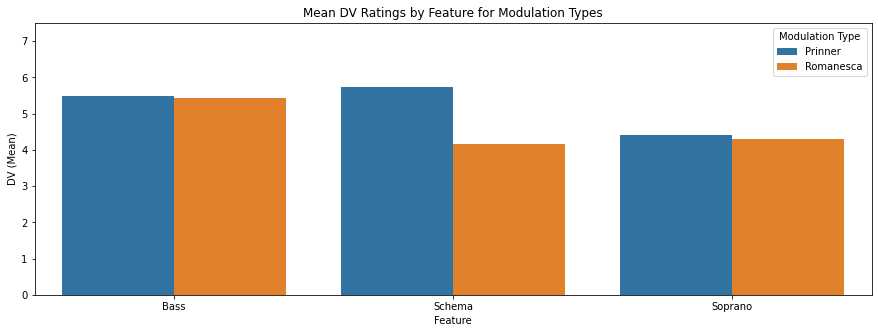

In [38]:
ax6 = sns.barplot(data=Plot_T6, x='Feature', y='DV (Mean)', hue='Modulation Type')

plt.ylim(top=7.5)

plt.title(label="Mean DV Ratings by Feature for Modulation Types")
plt.show()

##### Three Way Interaction

In [39]:
#the interaction has flipped, WHAT

Table_All_DV1 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Section','Feature', 'Mod_Type'], values="DV", aggfunc=['mean','std'])

Table_All_DV1

mean       std
                                        DV        DV
Sonata_Section Feature Mod_Type                     
Exposition     Bass    Prinner    5.627778  1.712173
                       Romanesca  5.005556  1.931921
               Schema  Prinner    5.666667  1.954181
                       Romanesca  4.166667  2.227898
               Soprano Prinner    4.711111  2.065654
                       Romanesca  4.461111  2.159558
Recapitulation Bass    Prinner    5.344444  1.749360
                       Romanesca  5.855556  1.140806
               Schema  Prinner    5.794444  1.820947
                       Romanesca  4.155556  2.302485
               Soprano Prinner    4.122222  2.315054
                       Romanesca  4.127778  2.091947

In [40]:
Plot_T7 = Table_All_DV1.reset_index(col_level=1)


Plot_T7.columns = ["Sonata Section", "Feature", "Modulation Type", 'DV (Mean)', 'std']

Plot_T7

,Sonata Section,Feature,Modulation Type,DV (Mean),std
0,Exposition,Bass,Prinner,5.627778,1.712173
1,Exposition,Bass,Romanesca,5.005556,1.931921
2,Exposition,Schema,Prinner,5.666667,1.954181
3,Exposition,Schema,Romanesca,4.166667,2.227898
4,Exposition,Soprano,Prinner,4.711111,2.065654
5,Exposition,Soprano,Romanesca,4.461111,2.159558
6,Recapitulation,Bass,Prinner,5.344444,1.749360
7,Recapitulation,Bass,Romanesca,5.855556,1.140806
8,Recapitulation,Schema,Prinner,5.794444,1.820947
9,Recapitulation,Schema,Romanesca,4.155556,2.302485


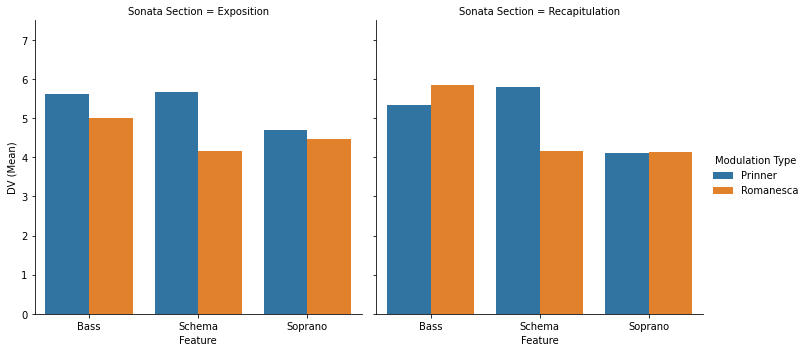

In [41]:
ax7 = sns.catplot(data=Plot_T7, x='Feature', y='DV (Mean)', hue='Modulation Type', col='Sonata Section', kind='bar')

plt.ylim(top=7.5)

plt.show()

#### iii. Effects of Order

In [42]:
df_DV1_long.shape

(216, 26)

In [43]:
(df_DV1_long.Sonata_Order.value_counts())/12

2    11.0
1     7.0
Name: Sonata_Order, dtype: float64

In [44]:
#Seems to be an effect of order! Order 1 = EXPO then RECAP, Order 2 = RECAP then EXPO

Table_OrderAll_DV1 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Order','Sonata_Section','Feature', 'Mod_Type'], values="DV", aggfunc=['mean','std'])

Table_OrderAll_DV1


mean       std
                                                     DV        DV
Sonata_Order Sonata_Section Feature Mod_Type                     
1            Exposition     Bass    Prinner    5.914286  1.030257
                                    Romanesca  4.571429  1.796955
                            Schema  Prinner    5.742857  1.463850
                                    Romanesca  4.371429  2.161569
                            Soprano Prinner    3.928571  1.817245
                                    Romanesca  4.214286  1.872101
             Recapitulation Bass    Prinner    4.757143  1.703777
                                    Romanesca  5.842857  0.888552
                            Schema  Prinner    5.971429  1.247283
                                    Romanesca  4.557143  2.087947
                            Soprano Prinner    3.657143  2.355035
                                    Romanesca  4.042857  2.160137
2            Exposition     Bass    Prinner    5.445455  2.062214
                                    Romanesca  5.281818  2.047349
                            Schema  Prinner    5.618182  2.280271
                                    Romanesca  4.036364  2.363587
                            Soprano Prinner    5.209091  2.137968
                                    Romanesca  4.618182  2.399091
             Recapitulation Bass    Prinner    5.718182  1.750896
                                    Romanesca  5.863636  1.318539
                            Schema  Prinner    5.681818  2.160471
                                    Romanesca  3.900000  2.492388
                            Soprano Prinner    4.418182  2.352793
                                    Romanesca  4.181818  2.152124

In [45]:
Plot_T8 = Table_OrderAll_DV1.reset_index(col_level=1)


Plot_T8.columns = ['Sonata Order', "Sonata Section", "Feature", "Modulation Type", 'DV (Mean)', 'std']

Plot_T8

,Sonata Order,Sonata Section,Feature,Modulation Type,DV (Mean),std
0,1,Exposition,Bass,Prinner,5.914286,1.030257
1,1,Exposition,Bass,Romanesca,4.571429,1.796955
2,1,Exposition,Schema,Prinner,5.742857,1.463850
3,1,Exposition,Schema,Romanesca,4.371429,2.161569
4,1,Exposition,Soprano,Prinner,3.928571,1.817245
5,1,Exposition,Soprano,Romanesca,4.214286,1.872101
6,1,Recapitulation,Bass,Prinner,4.757143,1.703777
7,1,Recapitulation,Bass,Romanesca,5.842857,0.888552
8,1,Recapitulation,Schema,Prinner,5.971429,1.247283
9,1,Recapitulation,Schema,Romanesca,4.557143,2.087947


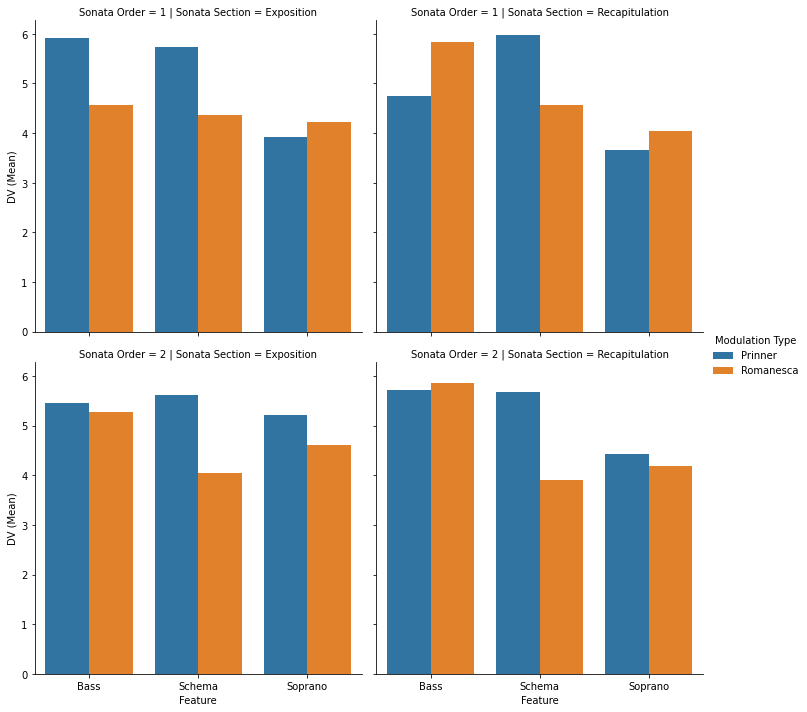

In [46]:
#Seems to be an effect of order, particularly on schema perception interacting with Sonata Section: When presented in 
#the original order (Expo/Recap), Prinner is more perceptible than Romanesca across both
#However, when the recap is presented first, both schema are more equally perceptible across sonata section
#I should do a between groups for order

sns.catplot(data=Plot_T8, x="Feature", y="DV (Mean)", hue='Modulation Type', col='Sonata Section', row='Sonata Order', kind='bar')

In [47]:
Table_Order_DV1_1 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Order','Sonata_Section'], values="DV", aggfunc=['mean','std'])

Table_Order_DV1_1

mean       std
                                   DV        DV
Sonata_Order Sonata_Section                    
1            Exposition      4.790476  1.792642
             Recapitulation  4.804762  1.910938
2            Exposition      5.034848  2.201572
             Recapitulation  4.960606  2.154771

In [48]:
Plot_T9 = Table_Order_DV1_1.reset_index(col_level=1)


Plot_T9.columns = ['Sonata Order', "Sonata Section", 'DV (Mean)', 'std']

Plot_T9

,Sonata Order,Sonata Section,DV (Mean),std
0,1,Exposition,4.790476,1.792642
1,1,Recapitulation,4.804762,1.910938
2,2,Exposition,5.034848,2.201572
3,2,Recapitulation,4.960606,2.154771


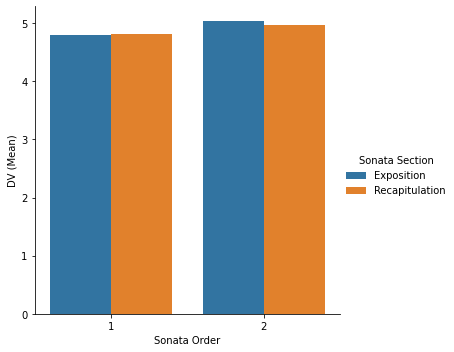

In [49]:
sns.catplot(data=Plot_T9, x="Sonata Order", y="DV (Mean)", hue='Sonata Section', kind='bar')

In [50]:
Table_Order_DV1_2 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Order','Sonata_Section', 'Feature'], values="DV", aggfunc=['mean','std'])

Table_Order_DV1_2


mean       std
                                           DV        DV
Sonata_Order Sonata_Section Feature                    
1            Exposition     Bass     5.242857  1.570259
                            Schema   5.057143  1.910986
                            Soprano  4.071429  1.778689
             Recapitulation Bass     5.300000  1.421808
                            Schema   5.264286  1.807934
                            Soprano  3.850000  2.180243
2            Exposition     Bass     5.363636  2.007022
                            Schema   4.827273  2.406575
                            Soprano  4.913636  2.238047
             Recapitulation Bass     5.790909  1.514347
                            Schema   4.790909  2.451998
                            Soprano  4.300000  2.203677

In [51]:
Plot_T10 = Table_Order_DV1_2.reset_index(col_level=1)

Plot_T10.columns = ['Sonata Order', "Sonata Section", "Feature", 'DV (Mean)', 'std']

Plot_T10

,Sonata Order,Sonata Section,Feature,DV (Mean),std
0,1,Exposition,Bass,5.242857,1.570259
1,1,Exposition,Schema,5.057143,1.910986
2,1,Exposition,Soprano,4.071429,1.778689
3,1,Recapitulation,Bass,5.300000,1.421808
4,1,Recapitulation,Schema,5.264286,1.807934
5,1,Recapitulation,Soprano,3.850000,2.180243
6,2,Exposition,Bass,5.363636,2.007022
7,2,Exposition,Schema,4.827273,2.406575
8,2,Exposition,Soprano,4.913636,2.238047
9,2,Recapitulation,Bass,5.790909,1.514347


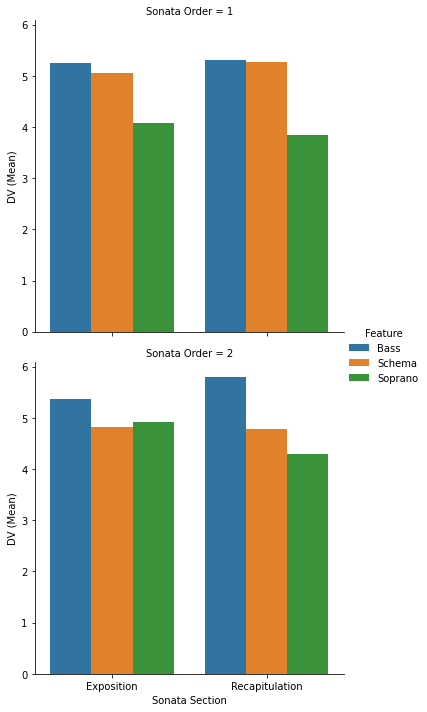

In [52]:
sns.catplot(data=Plot_T10, x="Sonata Section", y="DV (Mean)", hue='Feature',
            row='Sonata Order', kind='bar')

In [53]:
Table_Order_DV1_3 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Order', 'Feature', 'Mod_Type'], values="DV", aggfunc=['mean','std'])

Table_Order_DV1_3

mean       std
                                      DV        DV
Sonata_Order Feature Mod_Type                     
1            Bass    Prinner    5.335714  1.479921
                     Romanesca  5.207143  1.513256
             Schema  Prinner    5.857143  1.311907
                     Romanesca  4.464286  2.043981
             Soprano Prinner    3.792857  2.025782
                     Romanesca  4.128571  1.943996
2            Bass    Prinner    5.581818  1.872008
                     Romanesca  5.572727  1.706621
             Schema  Prinner    5.650000  2.167893
                     Romanesca  3.968182  2.371334
             Soprano Prinner    4.813636  2.230801
                     Romanesca  4.400000  2.235216

In [54]:
Plot_T11 = Table_Order_DV1_3.reset_index(col_level=1)

Plot_T11.columns = ['Sonata Order', "Feature", "Modulation Type", 'DV (Mean)', 'std']

Plot_T11

,Sonata Order,Feature,Modulation Type,DV (Mean),std
0,1,Bass,Prinner,5.335714,1.479921
1,1,Bass,Romanesca,5.207143,1.513256
2,1,Schema,Prinner,5.857143,1.311907
3,1,Schema,Romanesca,4.464286,2.043981
4,1,Soprano,Prinner,3.792857,2.025782
5,1,Soprano,Romanesca,4.128571,1.943996
6,2,Bass,Prinner,5.581818,1.872008
7,2,Bass,Romanesca,5.572727,1.706621
8,2,Schema,Prinner,5.650000,2.167893
9,2,Schema,Romanesca,3.968182,2.371334


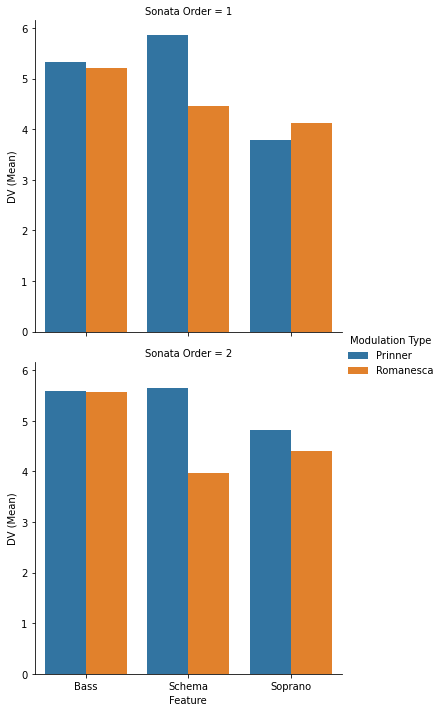

In [55]:
sns.catplot(data=Plot_T11, x='Feature', y="DV (Mean)", hue='Modulation Type',
            row='Sonata Order', kind='bar')

In [56]:
df_DV1_long.columns

Index(['Random_IDs', 'Sonata_Section', 'Feature', 'Mod_Type', 'DV',
       'Education_Level', 'Years_Theory', 'Years_Skills', 'Schemata_Expertise',
       'Excerpt_Familiarity', 'Excerpt_Analysis', 'Solfege_Hearing',
       'Schema_Hearing', 'Perfect_Pitch?', 'Interpretation_App',
       'Expertise_Group', 'Expertise_Group_solf', 'Sonata_Order', 'Expo_Order',
       'Expo_Bass_Order', 'Expo_Sop_Order', 'Expo_Schema_Order', 'Recap_Order',
       'Recap_Bass_Order', 'Recap_Sop_Order', 'Recap_Schema_Order'],
      dtype='object')

Effects of Expertise Level

In [57]:
Expert_all = pd.pivot_table(data=df_DV1_long, index=["Expertise_Group", 'Sonata_Section', 'Feature', 'Mod_Type'], values="DV", aggfunc=['mean','std'])

Expert_all

mean       std
                                                        DV        DV
Expertise_Group Sonata_Section Feature Mod_Type                     
Expert          Exposition     Bass    Prinner    6.820000  0.402492
                                       Romanesca  4.760000  1.785497
                               Schema  Prinner    7.000000  0.000000
                                       Romanesca  2.700000  1.590597
                               Soprano Prinner    6.280000  0.988433
                                       Romanesca  4.280000  2.593646
                Recapitulation Bass    Prinner    6.220000  1.744133
                                       Romanesca  5.460000  1.657709
                               Schema  Prinner    6.500000  1.118034
                                       Romanesca  2.660000  1.779888
                               Soprano Prinner    4.640000  2.539291
                                       Romanesca  4.280000  2.281885
Intermediate    Exposition     Bass    Prinner    5.144444  1.807008
                                       Romanesca  5.811111  1.030102
                               Schema  Prinner    5.677778  1.934411
                                       Romanesca  5.911111  1.191055
                               Soprano Prinner    4.488889  2.018319
                                       Romanesca  5.488889  1.483614
                Recapitulation Bass    Prinner    4.977778  1.769730
                                       Romanesca  6.211111  0.727056
                               Schema  Prinner    5.866667  1.570032
                                       Romanesca  5.711111  1.751745
                               Soprano Prinner    4.588889  2.316487
                                       Romanesca  4.988889  1.683333
Novice          Exposition     Bass    Prinner    5.225000  2.098214
                                       Romanesca  3.500000  3.000000
                               Schema  Prinner    3.975000  2.209638
                                       Romanesca  2.075000  1.556438
                               Soprano Prinner    3.250000  2.217356
                                       Romanesca  2.375000  1.600781
                Recapitulation Bass    Prinner    5.075000  1.776467
                                       Romanesca  5.550000  1.239624
                               Schema  Prinner    4.750000  2.872281
                                       Romanesca  2.525000  1.761391
                               Soprano Prinner    2.425000  1.588238
                                       Romanesca  2.000000  1.414214

In [58]:
Plot_Ex = Expert_all.reset_index(col_level=1)

Plot_Ex.columns = ['Expertise Group', 'Sonata Section', "Feature", "Modulation Type", 'DV (Mean)', 'std']

Plot_Ex

,Expertise Group,Sonata Section,Feature,Modulation Type,DV (Mean),std
0,Expert,Exposition,Bass,Prinner,6.820000,0.402492
1,Expert,Exposition,Bass,Romanesca,4.760000,1.785497
2,Expert,Exposition,Schema,Prinner,7.000000,0.000000
3,Expert,Exposition,Schema,Romanesca,2.700000,1.590597
4,Expert,Exposition,Soprano,Prinner,6.280000,0.988433
5,Expert,Exposition,Soprano,Romanesca,4.280000,2.593646
6,Expert,Recapitulation,Bass,Prinner,6.220000,1.744133
7,Expert,Recapitulation,Bass,Romanesca,5.460000,1.657709
8,Expert,Recapitulation,Schema,Prinner,6.500000,1.118034
9,Expert,Recapitulation,Schema,Romanesca,2.660000,1.779888


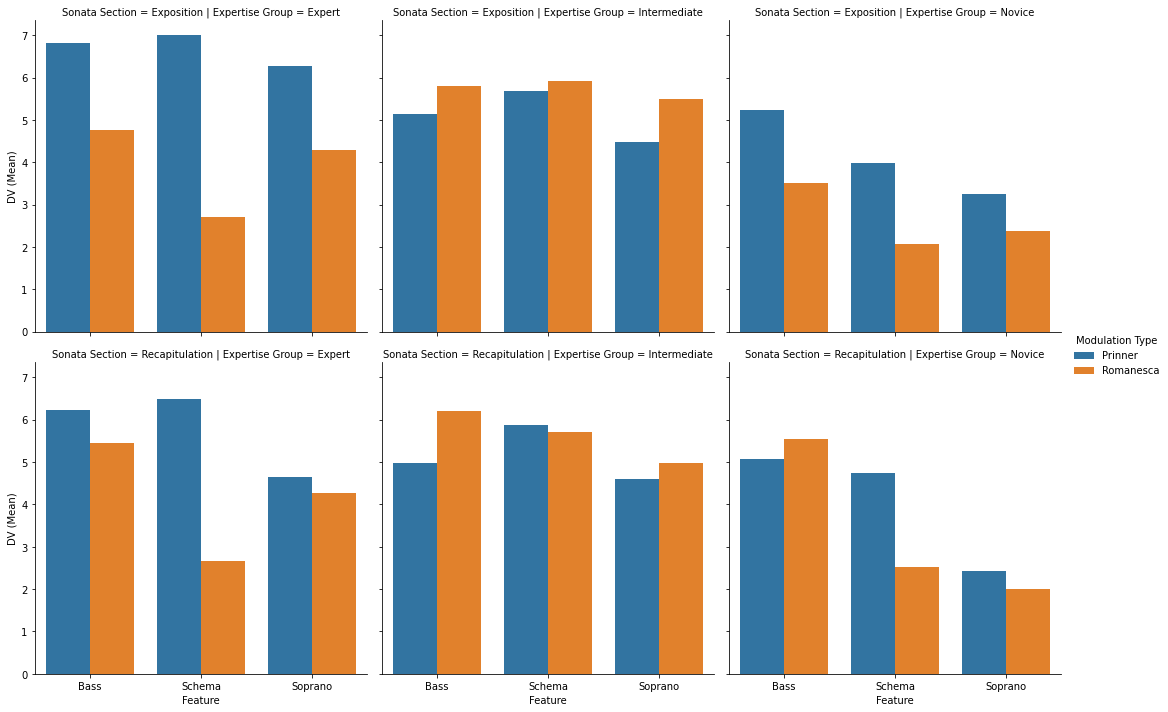

In [59]:
sns.catplot(data=Plot_Ex, x='Feature', y="DV (Mean)", hue='Modulation Type', col="Expertise Group",
            row='Sonata Section', kind='bar')

In [60]:
Expert_Mod = pd.pivot_table(data=df_DV1_long, index=["Expertise_Group", 'Mod_Type'], values="DV", aggfunc=['mean','std'])

Expert_Mod

mean       std
                                 DV        DV
Expertise_Group Mod_Type                     
Expert          Prinner    6.243333  1.499812
                Romanesca  4.023333  2.084538
Intermediate    Prinner    5.124074  1.895768
                Romanesca  5.687037  1.350757
Novice          Prinner    4.116667  2.178086
                Romanesca  3.004167  2.072276

In [61]:
Plot_ExMod = Expert_Mod.reset_index(col_level=1)

Plot_ExMod.columns = ['Expertise Group', "Modulation Type", 'DV (Mean)', 'std']

Plot_ExMod

,Expertise Group,Modulation Type,DV (Mean),std
0,Expert,Prinner,6.243333,1.499812
1,Expert,Romanesca,4.023333,2.084538
2,Intermediate,Prinner,5.124074,1.895768
3,Intermediate,Romanesca,5.687037,1.350757
4,Novice,Prinner,4.116667,2.178086
5,Novice,Romanesca,3.004167,2.072276


In [62]:
Expert_Feat = pd.pivot_table(data=df_DV1_long, index=["Expertise_Group", 'Feature'], values="DV", aggfunc=['mean','std'])


Expert_Feat

mean       std
                               DV        DV
Expertise_Group Feature                    
Expert          Bass     5.815000  1.599761
                Schema   4.715000  2.419716
                Soprano  4.870000  2.189953
Intermediate    Bass     5.536111  1.442845
                Schema   5.791667  1.566684
                Soprano  4.888889  1.862223
Novice          Bass     4.837500  2.070386
                Schema   3.331250  2.230013
                Soprano  2.512500  1.619413

In [63]:
Plot_ExFeat = Expert_Feat.reset_index(col_level=1)

Plot_ExFeat.columns = ['Expertise Group', "Feature", 'DV (Mean)', 'std']

Plot_ExFeat

,Expertise Group,Feature,DV (Mean),std
0,Expert,Bass,5.815000,1.599761
1,Expert,Schema,4.715000,2.419716
2,Expert,Soprano,4.870000,2.189953
3,Intermediate,Bass,5.536111,1.442845
4,Intermediate,Schema,5.791667,1.566684
5,Intermediate,Soprano,4.888889,1.862223
6,Novice,Bass,4.837500,2.070386
7,Novice,Schema,3.331250,2.230013
8,Novice,Soprano,2.512500,1.619413


## 3. Exploratory Analysis: DV2 (ease of change)

### a. Outliers

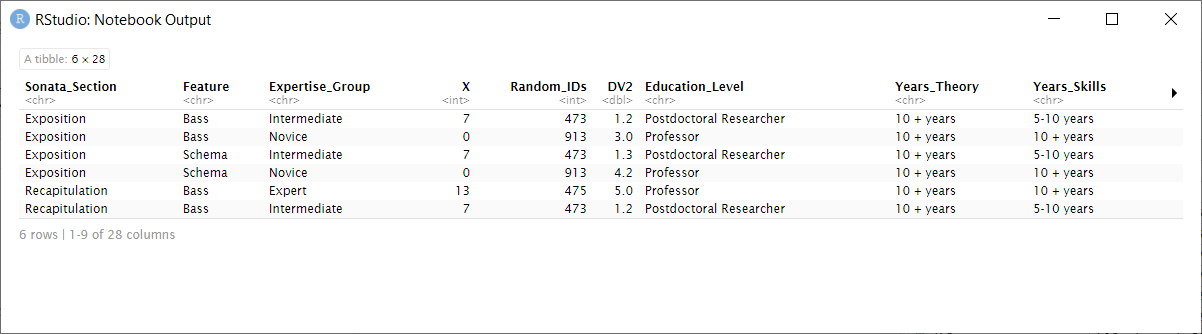

### b. Data Summaries and Pivot Tables

##### i. Main Effects

In [64]:
#ease of change ratings are nearly equal, but low across sonata section types. No main effect of section is likely. 

Table_Sonata_DV2 = pd.pivot_table(data=df_DV2_long, index=['Sonata_Section'], values="DV2", aggfunc=['mean','std'])

Table_Sonata_DV2

,mean,std
,DV2,DV2
Sonata_Section,,
Exposition,3.790741,2.204906
Recapitulation,3.527778,1.971631


In [65]:
#May be a main effect of feature, soprano lowest ease of change

Table_Feature_DV2 = pd.pivot_table(data=df_DV2_long, index=['Feature'], values="DV2", aggfunc=['mean','std'])

Table_Feature_DV2

,mean,std
,DV2,DV2
Feature,,
Bass,4.111111,1.993099
Schema,3.769444,2.125736
Soprano,3.097222,2.064736


In [66]:
# This finding is a bit odd. Despite low ease ratings between schema (Prinner, Romanesca) in the recap in DV1, here the
#exposition ease of change rating is highest for this group. Ease of change may not be reflecting differences in the interpretability
#between modulation types, particpants may have put a high rating if they could somewhat switch between one really convincing hearing
#and one not convincing hearing. I was expecting if Prinner/Romanesca hearing ease was low in DV1, that DV2 would also be low

Table_All_DV2 = pd.pivot_table(data=df_DV2_long, index=['Sonata_Section','Feature'], values="DV2", aggfunc=['mean','std'])

Table_All_DV2

mean       std
                             DV2       DV2
Sonata_Section Feature                    
Exposition     Bass     4.105556  2.224323
               Schema   3.855556  2.208599
               Soprano  3.411111  2.251506
Recapitulation Bass     4.116667  1.797466
               Schema   3.683333  2.099930
               Soprano  2.783333  1.870593

Effects of Order

In [67]:
Table_OrderALL_DV2 = pd.pivot_table(data=df_DV2_long, index=['Sonata_Order','Sonata_Section','Feature'], values="DV2", aggfunc=['mean','std'])

Table_OrderALL_DV2

mean       std
                                          DV2       DV2
Sonata_Order Sonata_Section Feature                    
1            Exposition     Bass     4.085714  2.451142
                            Schema   3.757143  2.011514
                            Soprano  3.000000  1.686219
             Recapitulation Bass     3.728571  2.011396
                            Schema   3.871429  1.977974
                            Soprano  2.714286  1.879210
2            Exposition     Bass     4.118182  2.192176
                            Schema   3.918182  2.419429
                            Soprano  3.672727  2.591946
             Recapitulation Bass     4.363636  1.700748
                            Schema   3.563636  2.260209
                            Soprano  2.827273  1.955552

In [68]:
Table_Order_DV2_1 = pd.pivot_table(data=df_DV2_long, index=['Sonata_Order','Sonata_Section'], values="DV2", aggfunc=['mean','std'])

Table_Order_DV2_1

mean       std
                                  DV2       DV2
Sonata_Order Sonata_Section                    
1            Exposition      3.614286  2.021456
             Recapitulation  3.438095  1.930149
2            Exposition      3.903030  2.337665
             Recapitulation  3.584848  2.025173

In [69]:
Table_Order_DV2_2 = pd.pivot_table(data=df_DV2_long, index=['Sonata_Order','Feature'], values="DV2", aggfunc=['mean','std'])

Table_Order_DV2_2

mean       std
                           DV2       DV2
Sonata_Order Feature                    
1            Bass     3.907143  2.162073
             Schema   3.814286  1.917473
             Soprano  2.857143  1.721678
2            Bass     4.240909  1.918744
             Schema   3.740909  2.291944
             Soprano  3.250000  2.281969

## 4. Visualizations for RM ANOVA: DV1

Shapiro Test Output from R

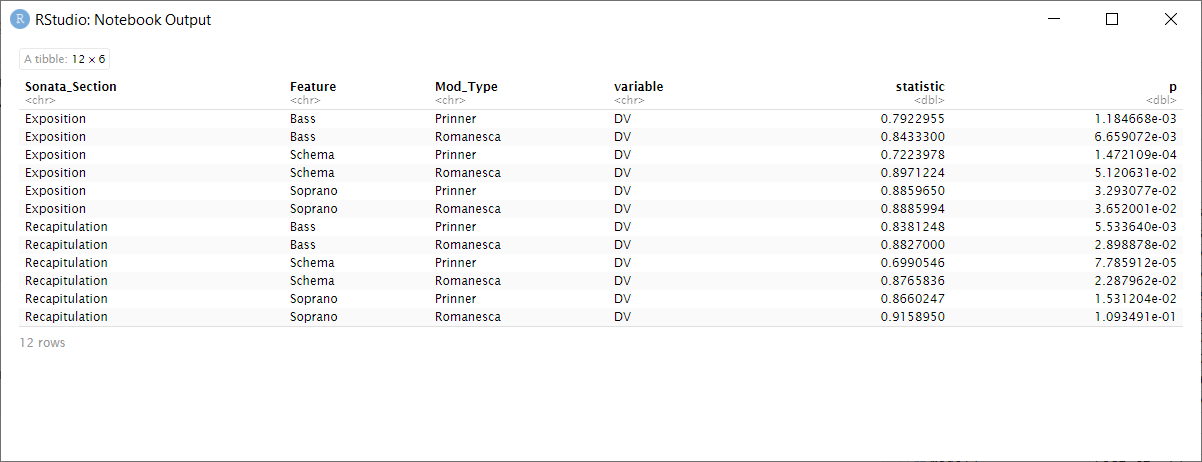

Levene Test Output

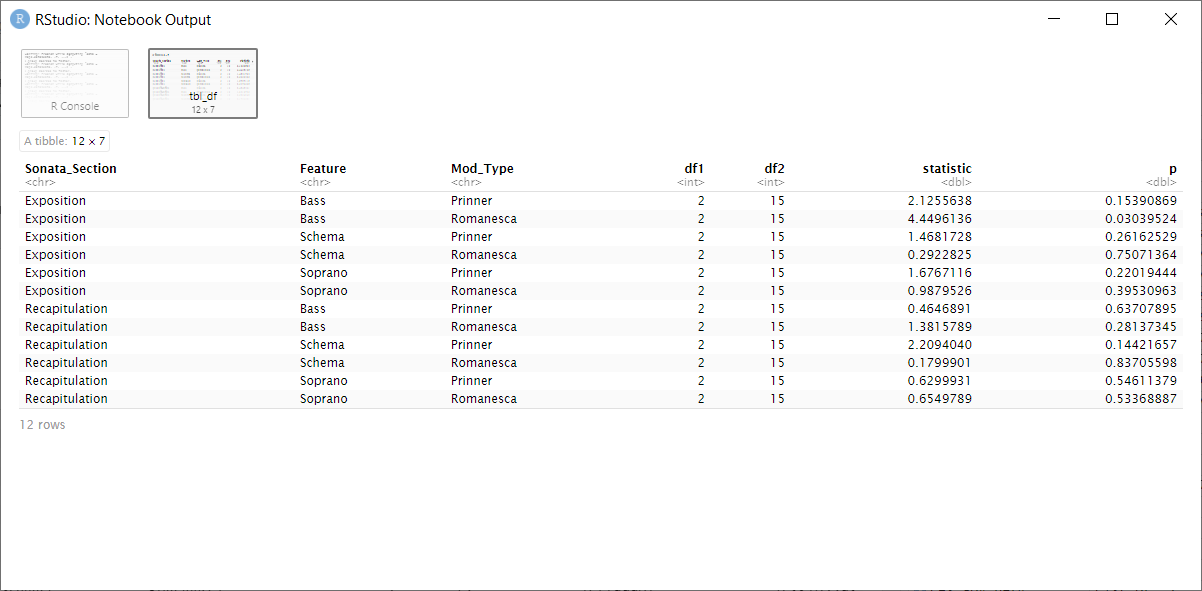

ANOVA TABLE

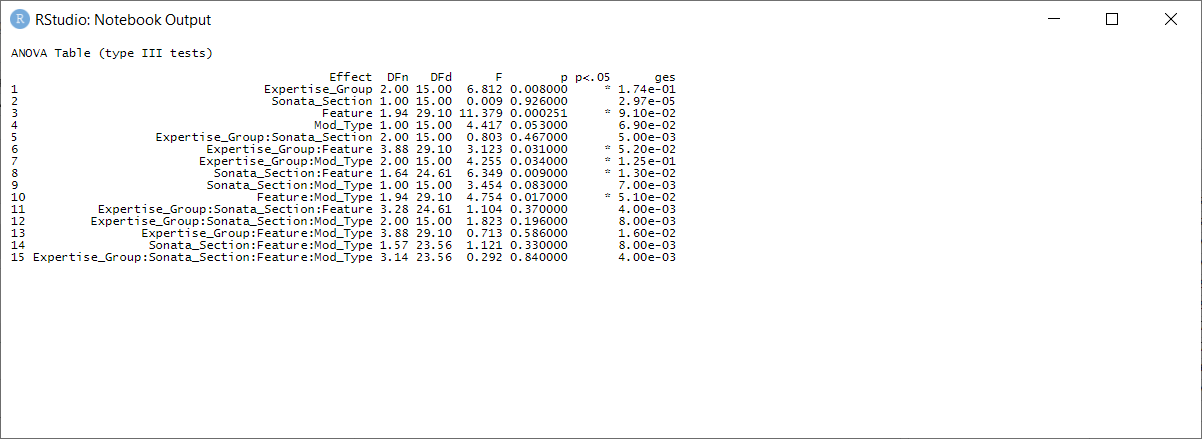

Nonsignificant Effects

In [70]:
Table_Sonata_Section_DV1

,mean,std
,DV,DV
Sonata_Section,,
Exposition,4.939815,2.046969
Recapitulation,4.900000,2.055628


Nonsignificant main effect of sonata section, F(1, 15) = 0.009, p = 0.926, Exposition (M = 4.93, sd = 2.04) was equal to recapitulation (M = 4.90, sd = 2.05) 

In [71]:
table1 = pd.pivot_table(data=df_DV1_long, values='DV', index=['Expertise_Group','Sonata_Section'], aggfunc=['mean', 'std'])

table1

mean       std
                                      DV        DV
Expertise_Group Sonata_Section                    
Expert          Exposition      5.306667  2.081103
                Recapitulation  4.960000  2.179624
Intermediate    Exposition      5.420370  1.618103
                Recapitulation  5.390741  1.720823
Novice          Exposition      3.400000  2.192477
                Recapitulation  3.720833  2.196238

Nonsignificant two-way interaction between Expertise group and sonata section, F(2, 15) = 0.803, p = 0.467. All groups had nonsignificant differences between exposition and recapitulation: Expert (Mexpo = 5.30, sd = 2.08 | Mrecap = 4.96, sd = 2.17), Intermediate (Mexpo = 5.42, sd = 1.61 | Mrecap = 5.39, sd = 1.72), Novice (Mexpo = 3.40, sd = 2.19 | Mrecap = 3.72, sd = 2.19)

In [72]:
table2 = pd.pivot_table(data=df_DV1_long, values='DV', index=['Sonata_Section', 'Mod_Type'], aggfunc=['mean', 'std'])

table2

mean       std
                                DV        DV
Sonata_Section Mod_Type                     
Exposition     Prinner    5.335185  1.931971
               Romanesca  4.544444  2.099566
Recapitulation Prinner    5.087037  2.067087
               Romanesca  4.712963  2.046170

Nonsignificant two-way interaction between sonata section and modulation type, F(1, 15) = 3.45, p = 0.083. Both Prinner and Romanesca were equally available in the Exposition (Mprinner = 5.33, sd = 1.93 | Mromanesca = 4.54, sd = 2.09) and Recapitulation (Mprinner = 5.08, sd = 2.06 | Mromanesca = 4.71, sd = 2.04)

In [73]:
table3 = pd.pivot_table(data=df_DV1_long, values='DV', index=['Expertise_Group', 'Sonata_Section', 'Feature'], aggfunc=['mean', 'std'])

table3

mean       std
                                              DV        DV
Expertise_Group Sonata_Section Feature                    
Expert          Exposition     Bass     5.790000  1.633299
                               Schema   4.850000  2.502110
                               Soprano  5.280000  2.129580
                Recapitulation Bass     5.840000  1.653414
                               Schema   4.580000  2.461616
                               Soprano  4.460000  2.283856
Intermediate    Exposition     Bass     5.477778  1.467513
                               Schema   5.794444  1.562981
                               Soprano  4.988889  1.793744
                Recapitulation Bass     5.594444  1.457828
                               Schema   5.788889  1.615691
                               Soprano  4.788889  1.975107
Novice          Exposition     Bass     4.362500  2.567899
                               Schema   3.025000  2.040133
                               Soprano  2.812500  1.850434
                Recapitulation Bass     5.312500  1.440672
                               Schema   3.637500  2.505957
                               Soprano  2.212500  1.410610

### a. Main Effects

Expertise Group

RM ANOVA showed a main effect of group F(2, 15) = 6.81, p = 0.008.

Tukey_HSD test revealed that the Expert (M = 5.13, sd = 2.12) and Intermediate (M = 5.40, sd = 1.66) groups differed significantly from the Novice (M = 3.56, sd = 2.17) groups.  

Expert and novice HSD: (p = 0.0001, 95% C.I. = [-2.44, -0.696]
Intermediate and novice HSD: (p = 0.000000259, 95% C.I. = [-2.63, -1.05]


In [74]:
Expertise_Table_DV1

,mean,std
,DV,DV
Expertise_Group,,
Expert,5.133333,2.120015
Intermediate,5.405556,1.662496
Novice,3.560417,2.176933


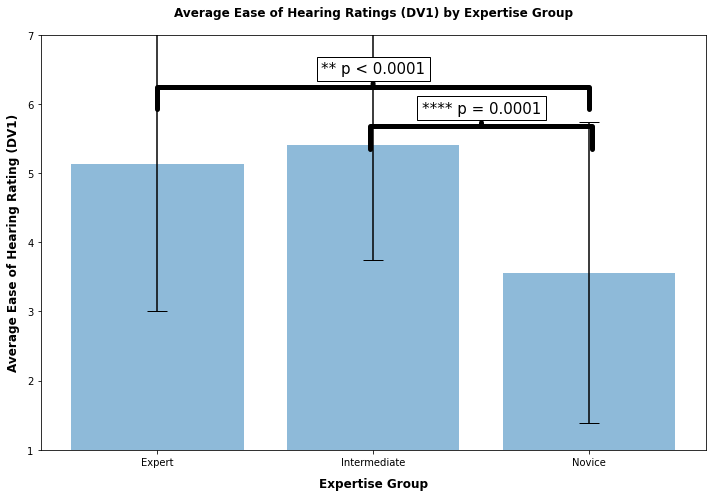

In [75]:
Groups = ["Expert", "Intermediate", 'Novice']
y_vals_ex = Expertise_Table_DV1[('mean', "DV")]
std_ex = Expertise_Table_DV1[('std', "DV")]
 
# Figure Size
fig, ax = plt.subplots(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(Groups, y_vals_ex, yerr=std_ex, color='tab:blue', align='center', alpha=0.5, ecolor='black', capsize=10)

ax.set_ylabel('Average Ease of Hearing Rating (DV1)', fontsize=12, labelpad=7, fontweight ='bold')
ax.set_xlabel("Expertise Group", fontsize=12, labelpad=10, fontweight ='bold')
ax.set_title('Average Ease of Hearing Ratings (DV1) by Expertise Group', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])

#annotations
ax.annotate('** p < 0.0001', xy=(0.5, 0.87), xytext=(0.5, 0.90), xycoords='axes fraction', 
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=14.4, lengthB=1.5', facecolor='blue', lw=5.0))

ax.annotate('**** p = 0.0001', xy=(0.663, 0.775), xytext=(0.663, 0.805), xycoords='axes fraction',
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=7.4, lengthB=1.5', facecolor='blue', lw=5.0))
# Save
plt.tight_layout()
plt.savefig('Average DV1_Expertise Main_NoOut_June20.png', format='png', pad_inches=0.5, bbox_inches='tight')

# Show Plot
plt.show()


Feature

There was a main effect of feature, F(1.94, 29.10) = 11.37, p = 0.0002. Corrected for violation of sphericty violation using GG, ε = 0.970

Post-hoc Tucky HSD showed that this effect comes from a statistically significant difference between the Bass (M = 5.45, sd = 1.65) and Soprano (M = 4.35, sd = 2.12) features, p = 0.003.

Bass and soprano HSD: (p =0.003, 95% C.I. = [-1.89, -0.313]

In [76]:
Table_Feature_DV1

,mean,std
,DV,DV
Feature,,
Bass,5.458333,1.656039
Schema,4.945833,2.189214
Soprano,4.355556,2.128670


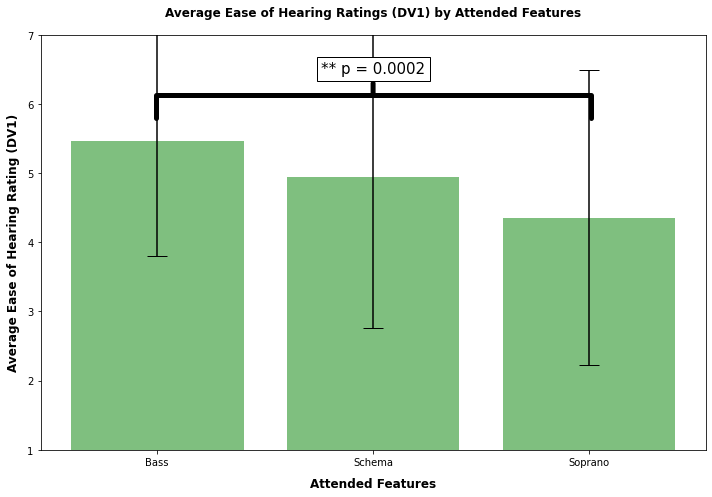

In [77]:
Features = ["Bass", "Schema", "Soprano"]
y_vals_ft = Table_Feature_DV1[('mean', "DV")]
std_ft = Table_Feature_DV1[('std', "DV")]
 
# Figure Size
fig, ax = plt.subplots(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(Features, y_vals_ft, yerr=std_ft, color = 'green', align='center', alpha=0.5, ecolor='black', capsize=10)

ax.set_ylabel('Average Ease of Hearing Rating (DV1)', fontsize=12, labelpad=7, fontweight ='bold')
ax.set_xlabel("Attended Features", fontsize=12, labelpad=10, fontweight ='bold')
ax.set_title('Average Ease of Hearing Ratings (DV1) by Attended Features', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])
 

#annotations
ax.annotate('** p = 0.0002', xy=(0.5, 0.85), xytext=(0.5, 0.9), xycoords='axes fraction', 
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=14.5, lengthB=1.5', facecolor='blue', lw=5.0))

#save 
plt.tight_layout()
plt.savefig('Average DV1_Features Main_all_NoOut_June20.png', format='png', pad_inches=0.5, bbox_inches='tight')

# Show Plot
plt.show()



In [78]:
df_feature_noschema = df_DV1_long[df_DV1_long['Feature'] != 'Schema']

df_feature_noschema

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
Index,,,,,,,,,,,,,,,,,,,,,
0,913,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,...,Expert,2,5,1,1,2,3,1,1,2
1,834,Exposition,Bass,Romanesca,5.1,Graduate Student,5-10 years,5-10 years,Familiar,This was the first time I have heard this,...,Intermediate,1,3,2,2,2,1,2,2,1
2,719,Exposition,Bass,Romanesca,6.5,Graduate Student,1-2 years,3-5 years,Somewhat familiar,I have heard this before,...,Intermediate,2,3,2,2,1,6,2,1,1
3,862,Exposition,Bass,Romanesca,4.6,Graduate Student,5-10 years,5-10 years,Very familiar,This was the first time I have heard this,...,Intermediate,1,3,1,1,1,3,1,2,2
4,686,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Very familiar,This was the first time I have heard this,...,Expert,2,1,2,1,1,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,392,Recapitulation,Soprano,Prinner,3.0,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,1,1,1,2,2,1,1,2,2
15,244,Recapitulation,Soprano,Prinner,1.2,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,1,2,1,1,2,2,2,1
16,148,Recapitulation,Soprano,Prinner,3.0,Professor,10 + years,10 + years,Somewhat familiar,I have heard this before,...,Intermediate,1,5,2,1,1,4,1,1,1


In [79]:
Table_features = pd.pivot_table(data=df_feature_noschema, index=['Feature'], values="DV", aggfunc=['mean','std'] )

Table_features

,mean,std
,DV,DV
Feature,,
Bass,5.458333,1.656039
Soprano,4.355556,2.128670


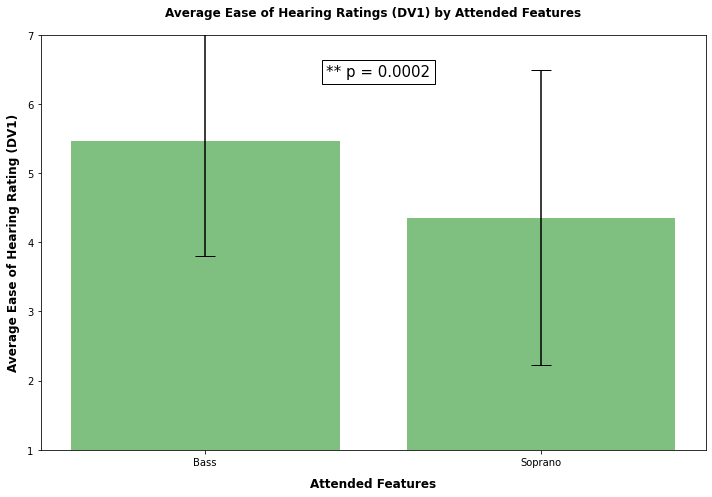

In [80]:
Features2 = ["Bass", "Soprano"]
y_vals_ft2 = Table_features[('mean', "DV")]
std_ft2 = Table_features[('std', "DV")]
 
# Figure Size
fig, ax = plt.subplots(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(Features2, y_vals_ft2, yerr=std_ft2, color = 'green', align='center', alpha=0.5, ecolor='black', capsize=10)

ax.set_ylabel('Average Ease of Hearing Rating (DV1)', fontsize=12, labelpad=7, fontweight ='bold')
ax.set_xlabel("Attended Features", fontsize=12, labelpad=10, fontweight ='bold')
ax.set_title('Average Ease of Hearing Ratings (DV1) by Attended Features', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])

#annotations
t = ax.text(0.36, 6.4, "** p = 0.0002", size=15,  bbox=dict(boxstyle='square', fc='white'))

#save 
plt.tight_layout()
plt.savefig('Average DV1_Features Main_NoOut.png', format='png', pad_inches=0.5, bbox_inches='tight')

# Show Plot
plt.show()



Modulation Type *NONSIGNIFICANT NOW*

Nonsignficant main effect of mod type, F(1,15)= 4.41, p = 0.053. 

Prinner (M = 5.21, sd = 1.99) higher than Romanesca (M = 4.62, sd = 2.06)

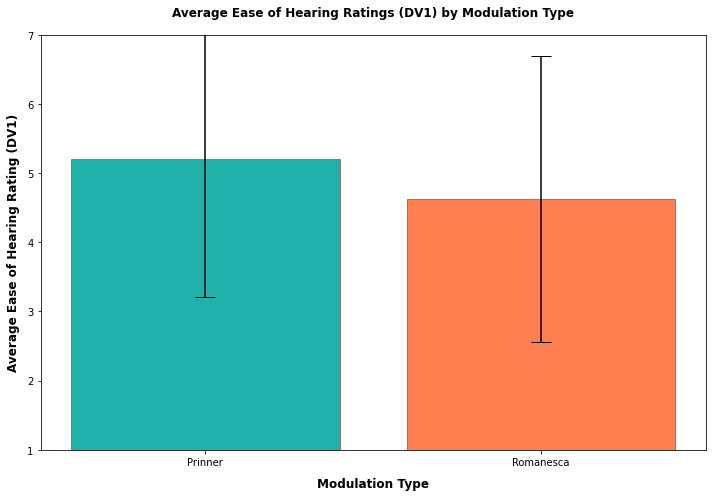

In [81]:
Mods = ["Prinner", "Romanesca"]
mod_vals = Table_Schema_DV1[('mean', "DV")]
mod_std = Table_Schema_DV1[('std', "DV")]
 
# Figure Size
fig, ax = plt.subplots(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(Mods, mod_vals, yerr=mod_std, color = ['lightseagreen', 'coral'], align='center', alpha=1, ecolor='black', capsize=10,
        edgecolor ='grey')

ax.set_ylabel('Average Ease of Hearing Rating (DV1)', fontsize=12, labelpad=7, fontweight ='bold')
ax.set_xlabel("Modulation Type", fontsize=12, labelpad=10, fontweight ='bold')
ax.set_title('Average Ease of Hearing Ratings (DV1) by Modulation Type', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])

#annotations
t = ax.text(0.36, 6.4, "", size=15,  bbox=dict(boxstyle='square', fc='white'))

#save 
plt.tight_layout()
plt.savefig('Mod_Type_NoOut_June20.png', format='png', pad_inches=0.5, bbox_inches='tight')

# Show Plot
plt.show()

In [82]:
Table_Schema_DV1

,mean,std
,DV,DV
Mod_Type,,
Prinner,5.211111,1.995197
Romanesca,4.628704,2.065065


### b. Interactions

Expertise Group by Feature

The RM ANOVA showed an interaction between Expertise Group and Feature, F(3.88, 29.10) = 3.12, p = 0.031. Corrected for violation of sphericity violation using GG, ε = 0.970

Post-hoc Tucky HSD test showed that the Novice group, the Bass (M = 4.83, sd = 2.07) and Soprano (M = 2.51, sd = 1.62) differed significantly from one another (p = 0.005, 95% C.I. = [-4.03, -0.619]

In [83]:
Expert_Feat

mean       std
                               DV        DV
Expertise_Group Feature                    
Expert          Bass     5.815000  1.599761
                Schema   4.715000  2.419716
                Soprano  4.870000  2.189953
Intermediate    Bass     5.536111  1.442845
                Schema   5.791667  1.566684
                Soprano  4.888889  1.862223
Novice          Bass     4.837500  2.070386
                Schema   3.331250  2.230013
                Soprano  2.512500  1.619413

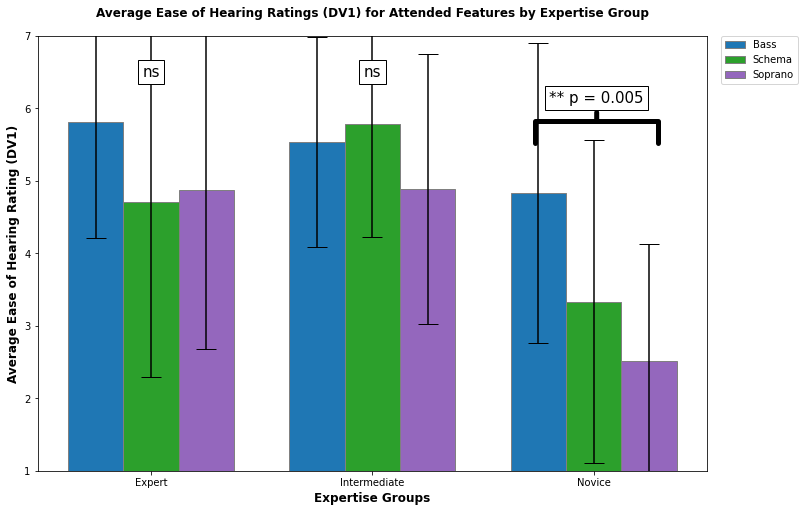

In [84]:
barWidth = 0.25
fig, ax = plt.subplots(figsize =(12, 8))

# set height of bar
bass_ex = Expert_Feat.loc[[('Expert', 'Bass'), ('Intermediate', 'Bass'), ('Novice', 'Bass')], [('mean', "DV")]].squeeze()
schema_ex = Expert_Feat.loc[[('Expert', 'Schema'), ('Intermediate', 'Schema'), ('Novice', 'Schema')], [('mean', "DV")]].squeeze()
sop_ex = Expert_Feat.loc[[('Expert', 'Soprano'), ('Intermediate', 'Soprano'), ('Novice', 'Soprano')], [('mean', "DV")]].squeeze()

#stds
bass_ex_std = Expert_Feat.loc[[('Expert', 'Bass'), ('Intermediate', 'Bass'), ('Novice', 'Bass')], [('std', "DV")]].squeeze()
schema_ex_std = Expert_Feat.loc[[('Expert', 'Schema'), ('Intermediate', 'Schema'), ('Novice', 'Schema')], [('std', "DV")]].squeeze()
sop_ex_std = Expert_Feat.loc[[('Expert', 'Soprano'), ('Intermediate', 'Soprano'), ('Novice', 'Soprano')], [('std', "DV")]].squeeze()

 
# Set position of bar on X axis
br1_ex = np.arange(len(bass_ex))
br2_ex = [x + barWidth for x in br1_ex]
br3_ex = [x + barWidth for x in br2_ex]
 
# Make the plot
plt.bar(br1_ex, bass_ex, yerr=bass_ex_std, ecolor='black', capsize=10, color ='tab:blue', width = barWidth,
        edgecolor ='grey', label ='Bass')
plt.bar(br2_ex, schema_ex, yerr=schema_ex_std, ecolor='black', capsize=10, color ='tab:green', width = barWidth,
        edgecolor ='grey', label ='Schema')
plt.bar(br3_ex, sop_ex, yerr=sop_ex_std, ecolor='black', capsize=10, color ='tab:purple', width = barWidth,
        edgecolor ='grey', label ='Soprano')
 
# Adding Xticks
plt.xlabel('Expertise Groups', fontweight ='bold', fontsize = 12)
plt.ylabel('Average Ease of Hearing Rating (DV1)', fontweight ='bold', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(bass_ex))],
        ['Expert', 'Intermediate', 'Novice'])
ax.set_title('Average Ease of Hearing Ratings (DV1) for Attended Features by Expertise Group', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])

#annotations 
t1 = ax.text(0.25, 6.5, "ns", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))
t2 = ax.text(1.25, 6.5, "ns", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))
#t3 = ax.text(2.36, 6.5, "** p = 0.005", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))

ax.annotate('** p = 0.005', xy=(0.835, 0.8), xytext=(0.835, 0.84), xycoords=('axes fraction'),
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=4.1, lengthB=1.5', facecolor='blue', lw=5.0))


plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('Average DV1_Feature by Expertise_NoOut_June20.png', format='png', pad_inches=0.5, bbox_inches='tight')

plt.show()


Expertise Group by Modulation Type

F(2, 15) = 4.25, p = 0.034.

Post hoc Tucky HSD revealed that that for the Expert group only, the Prinner (M = 6.24, sd = 1.49) and Romanesca (M = 4.02, sd = 2.08) differed significantly, (p < 0.0001, 95% C.I. = [-3.15, -1.28]


p = 0.0000145

In [85]:
Expert_Mod

mean       std
                                 DV        DV
Expertise_Group Mod_Type                     
Expert          Prinner    6.243333  1.499812
                Romanesca  4.023333  2.084538
Intermediate    Prinner    5.124074  1.895768
                Romanesca  5.687037  1.350757
Novice          Prinner    4.116667  2.178086
                Romanesca  3.004167  2.072276

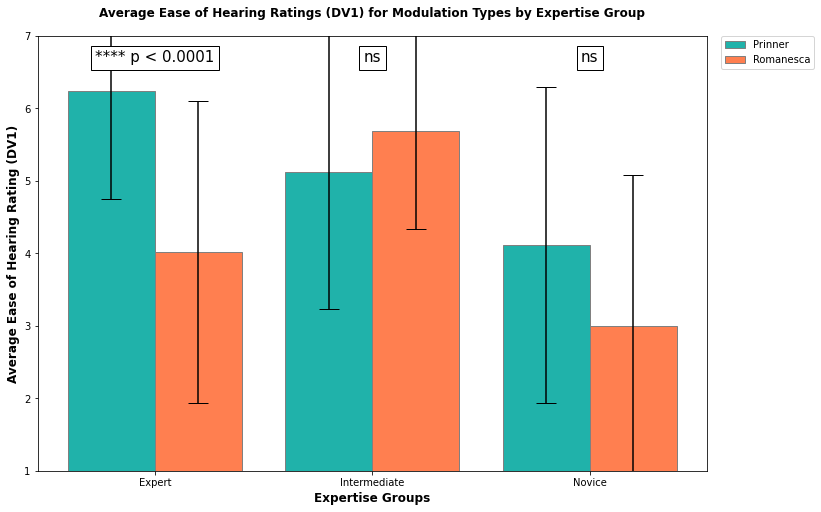

In [86]:
barWidth = 0.4
fig, ax = plt.subplots(figsize =(12, 8))

# set height of bar
Prin_ex = Expert_Mod.loc[[('Expert', 'Prinner'), ('Intermediate', 'Prinner'), ('Novice', 'Prinner')], [('mean', "DV")]].squeeze()
Rom_ex = Expert_Mod.loc[[('Expert', 'Romanesca'), ('Intermediate', 'Romanesca'), ('Novice', 'Romanesca')], [('mean', "DV")]].squeeze()


#stds
Prin_ex_std = Expert_Mod.loc[[('Expert', 'Prinner'), ('Intermediate', 'Prinner'), ('Novice', 'Prinner')], [('std', "DV")]].squeeze()
Rom_ex_std = Expert_Mod.loc[[('Expert', 'Romanesca'), ('Intermediate', 'Romanesca'), ('Novice', 'Romanesca')], [('std', "DV")]].squeeze()
 
# Set position of bar on X axis
br1_md = np.arange(len(Prin_ex))
br2_md = [x + (barWidth) for x in br1_md]
br3_md = [x + (barWidth*0.5) for x in br2_md]
 
# Make the plot
plt.bar(br1_md, Prin_ex, yerr=Prin_ex_std, ecolor='black', capsize=10, color ='lightseagreen', width = barWidth,
        edgecolor ='grey', label ='Prinner')
plt.bar(br2_md, Rom_ex, yerr=Rom_ex_std, ecolor='black', capsize=10, color ='coral', width = barWidth, 
        edgecolor ='grey', label ='Romanesca')

# Adding Xticks
plt.xlabel('Expertise Groups', fontweight ='bold', fontsize = 12)
plt.ylabel('Average Ease of Hearing Rating (DV1)', fontweight ='bold', fontsize = 12)
plt.xticks([r + (barWidth*0.5) for r in range(3)],
        ['Expert', 'Intermediate', 'Novice'])
ax.set_title('Average Ease of Hearing Ratings (DV1) for Modulation Types by Expertise Group', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])

# annotations
t1 = ax.text(0.20, 6.7, "**** p < 0.0001", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))
t2 = ax.text(1.20, 6.7, "ns", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))
t3 = ax.text(2.20, 6.7, "ns", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))


plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('Average DV1_Mod by Expertise_NoOut_June20.png', format='png', pad_inches=0.5, bbox_inches='tight')

plt.show()


Sonata Section by Feature

F(1.64, 24.61) = 6.34, p =0.009, Corrected for violation of sphericity violation using GG, ε = 0.820

Tukey HSD post hoc revealed that the Bass (M = 5.60, sd = 1.47) and Soprano (M = 4.12, sd = 2.17) for the Recap differed significantly, (p = 0.005, 95% C.I. = [-2.58, -0.364]

In [87]:
Table_Sect_Feat_DV1

mean       std
                              DV        DV
Sonata_Section Feature                    
Exposition     Bass     5.316667  1.826550
               Schema   4.916667  2.200974
               Soprano  4.586111  2.086577
Recapitulation Bass     5.600000  1.478416
               Schema   4.975000  2.208215
               Soprano  4.125000  2.174577

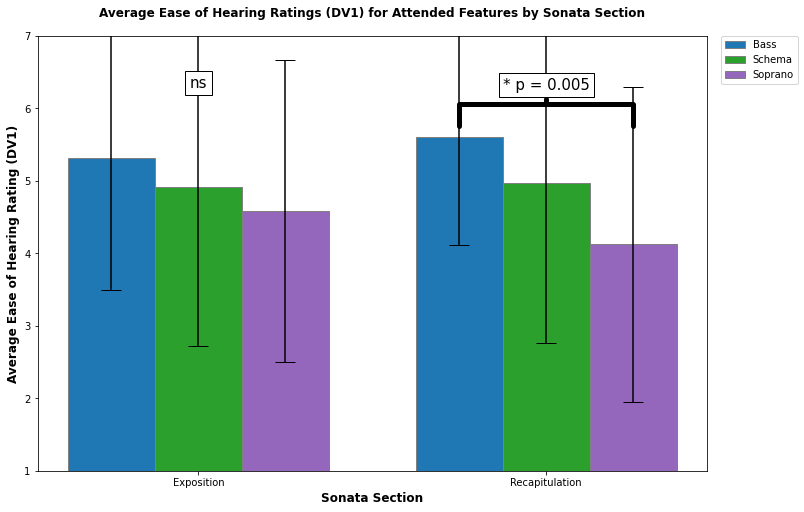

In [88]:
barWidth = 0.25
fig, ax = plt.subplots(figsize =(12, 8))

# set height of bar
bass_s = Table_Sect_Feat_DV1.loc[[('Exposition', 'Bass'), ('Recapitulation', 'Bass')], [('mean', "DV")]].squeeze()
schema_s = Table_Sect_Feat_DV1.loc[[('Exposition', 'Schema'), ('Recapitulation', 'Schema')], [('mean', "DV")]].squeeze()
sop_s = Table_Sect_Feat_DV1.loc[[('Exposition', 'Soprano'), ('Recapitulation', 'Soprano')], [('mean', "DV")]].squeeze()

#stds
bass_s_std = Table_Sect_Feat_DV1.loc[[('Exposition', 'Bass'), ('Recapitulation', 'Bass')], [('std', "DV")]].squeeze()
schema_s_std = Table_Sect_Feat_DV1.loc[[('Exposition', 'Schema'), ('Recapitulation', 'Schema')], [('std', "DV")]].squeeze()
sop_s_std = Table_Sect_Feat_DV1.loc[[('Exposition', 'Soprano'), ('Recapitulation', 'Soprano')], [('std', "DV")]].squeeze()
 
# Set position of bar on X axis
br1_s = np.arange(len(bass_s))
br2_s = [x + barWidth for x in br1_s]
br3_s = [x + barWidth for x in br2_s]
 
# Make the plot
plt.bar(br1_s, bass_s, yerr=bass_s_std, ecolor='black', capsize=10, color ='tab:blue', width = barWidth,
        edgecolor ='grey', label ='Bass')
plt.bar(br2_s, schema_s, yerr=schema_s_std, ecolor='black', capsize=10, color ='tab:green', width = barWidth,
        edgecolor ='grey', label ='Schema')
plt.bar(br3_s, sop_s, yerr=sop_s_std, ecolor='black', capsize=10, color ='tab:purple', width = barWidth,
        edgecolor ='grey', label ='Soprano')
 
# Adding Xticks
plt.xlabel('Sonata Section',fontweight ='bold', fontsize = 12)
plt.ylabel('Average Ease of Hearing Rating (DV1)', fontweight ='bold', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(bass_s))],
        ['Exposition', 'Recapitulation'])
ax.set_title('Average Ease of Hearing Ratings (DV1) for Attended Features by Sonata Section', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])

# annotations
t1 = ax.text(0.25, 6.35, "ns", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))
ax.annotate('* p = 0.005', xy=(0.76, 0.84), xytext=(0.76, 0.87), xycoords=('axes fraction'),
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=5.8, lengthB=1.5', facecolor='blue', lw=5.0))

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('Average DV1_Feature by Sonata Section_NoOut_June20.png', format='png', pad_inches=0.5, bbox_inches='tight')

plt.show()


Feature by Modulation Type

F(1.95, 29.10) = 4.75, p = 0.017, Corrected for violation of sphericity violation using GG, ε = 0.970.

Post-hoc Tukey HSD revealed that for the Schema attending feature, the Prinner (M = 5.73, sd = 1.86) and Romanesca (M = 4.16, sd = 2.23) differed significantly, (p = 0.001, 95% C.I. = [-2.53, -0.602])

In [89]:
Table_Feat_Mod_DV1

mean       std
                         DV        DV
Feature Mod_Type                     
Bass    Prinner    5.486111  1.712000
        Romanesca  5.430556  1.621960
Schema  Prinner    5.730556  1.862689
        Romanesca  4.161111  2.232907
Soprano Prinner    4.416667  2.182855
        Romanesca  4.294444  2.102236

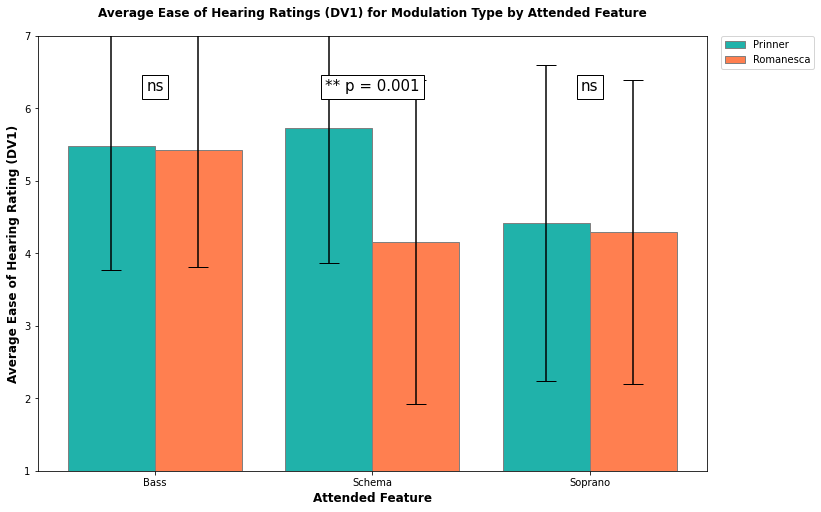

In [90]:
barWidth = 0.4
fig, ax = plt.subplots(figsize =(12, 8))

# set height of bar
Prin_m = Table_Feat_Mod_DV1.loc[[('Bass', 'Prinner'), ('Schema', 'Prinner'), ('Soprano','Prinner')], [('mean', "DV")]].squeeze()
Rom_m = Table_Feat_Mod_DV1.loc[[('Bass', 'Romanesca'), ('Schema', 'Romanesca'), ('Soprano','Romanesca')], [('mean', "DV")]].squeeze()

#stds
Prin_m_std = Table_Feat_Mod_DV1.loc[[('Bass', 'Prinner'), ('Schema', 'Prinner'), ('Soprano','Prinner')], [('std', "DV")]].squeeze()
Rom_m_std = Table_Feat_Mod_DV1.loc[[('Bass', 'Romanesca'), ('Schema', 'Romanesca'), ('Soprano','Romanesca')], [('std', "DV")]].squeeze()

 
# Set position of bar on X axis
br1_fm = np.arange(len(Prin_m))
br2_fm = [x + barWidth for x in br1_fm]
br3_fm = [x + barWidth for x in br2_fm]
 
# Make the plot
plt.bar(br1_fm, Prin_m, yerr=Prin_m_std, ecolor='black', capsize=10, color ='lightseagreen', width = barWidth,
        edgecolor ='grey', label ='Prinner')
plt.bar(br2_fm, Rom_m, yerr=Rom_m_std, ecolor='black', capsize=10, color ='coral', width = barWidth,
        edgecolor ='grey', label ='Romanesca')

# Adding Xticks
plt.xlabel('Attended Feature',fontweight ='bold', fontsize = 12)
plt.ylabel('Average Ease of Hearing Rating (DV1)', fontweight ='bold', fontsize = 12)
plt.xticks([r + (barWidth*0.5) for r in range(len(Prin_m))],
        ['Bass', 'Schema', "Soprano"])
ax.set_title('Average Ease of Hearing Ratings (DV1) for Modulation Type by Attended Feature', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])

# annotations
#ax.annotate('** p = 0.004', xy=(0.175, 0.84), xytext=(0.175, 0.88), xycoords=('axes fraction'),
            #fontsize=15, ha='center', va='bottom',
            #bbox=dict(boxstyle='square', fc='white'),
            #arrowprops=dict(arrowstyle='-[, widthB=2.9, lengthB=1.5', facecolor='blue', lw=5.0))

t1 = ax.text(0.20, 6.3, 'ns', ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))
t2 = ax.text(1.20, 6.3, "** p = 0.001", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))
t3 = ax.text(2.20, 6.3, "ns", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('Average DV1_Mod by Feature_NoOut_June20.png', format='png', pad_inches=0.5, bbox_inches='tight')

plt.show()


## 5. Visualizations for RM ANOVA: DV2

DV2 Shapiro Test

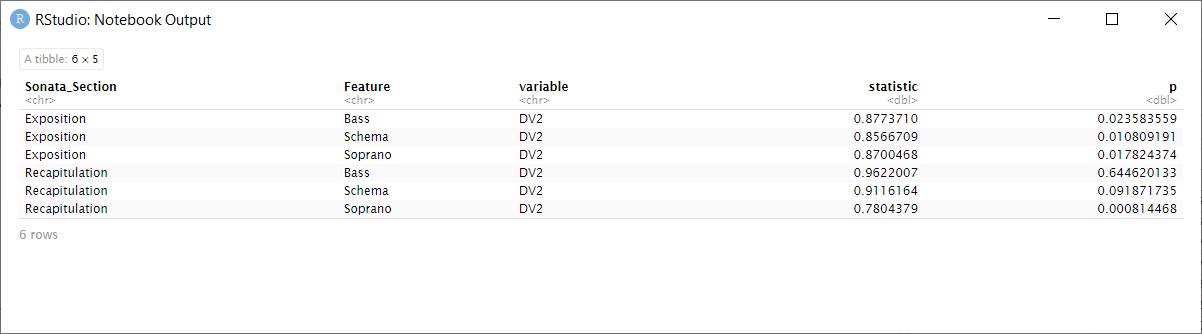

DV2 Levene

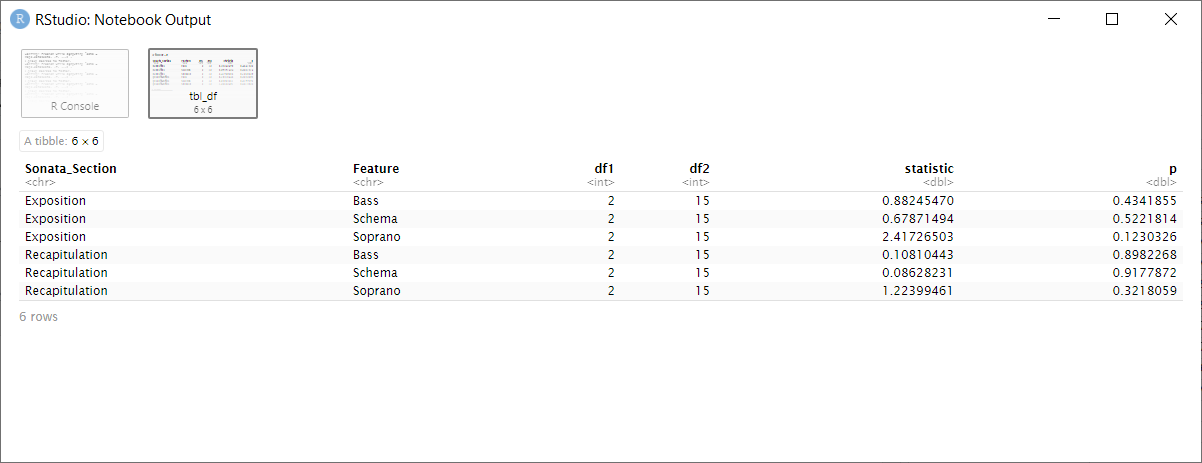

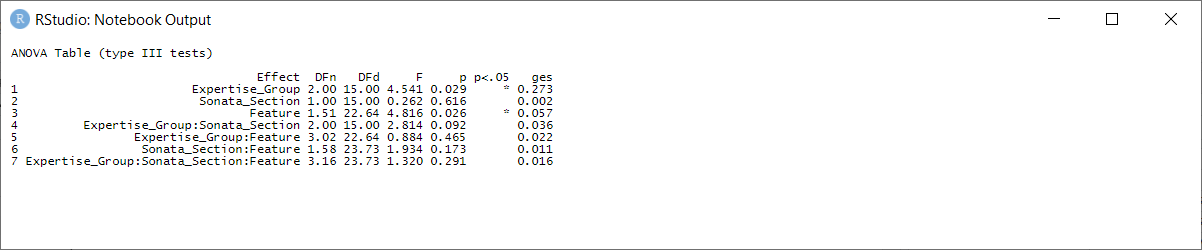

NONSIG

Nonsignficiant main effect of Sonata Section (F(1,15) = 0.262, p = 0.616

### a. Main Effects

Expertise Group

RM ANOVA revealed a main effect of expertise group, F(2, 15) = 4.54, p = 0.029 

Post doc Tukey HSD revealed that Expert and Intermediate groups differed from the Novice Group: Expert (M = 3.57, sd = 2.06) and Intermediate (M = 4.49, sd = 1.82), Novice (M = 1.88, sd = 1.50) groups.

Expert and Intermediate (p = 0.0735, C.I. 95% C.I. = [-0.068, 1.91])
Expert and Novice (p = 0.00273, 95% C.I. = [-2.89, -0.511]
Intermediate and Novice (p < 0.0001, 95% C.I. = [-3.68, -1.55]
p = 0.000000170

In [91]:
Expert_DV2 = pd.pivot_table(data=df_DV2_long, index=["Expertise_Group"], values="DV2", aggfunc=['mean','std'])

Expert_DV2

,mean,std
,DV2,DV2
Expertise_Group,,
Expert,3.576667,2.065761
Intermediate,4.498148,1.818302
Novice,1.875000,1.503113


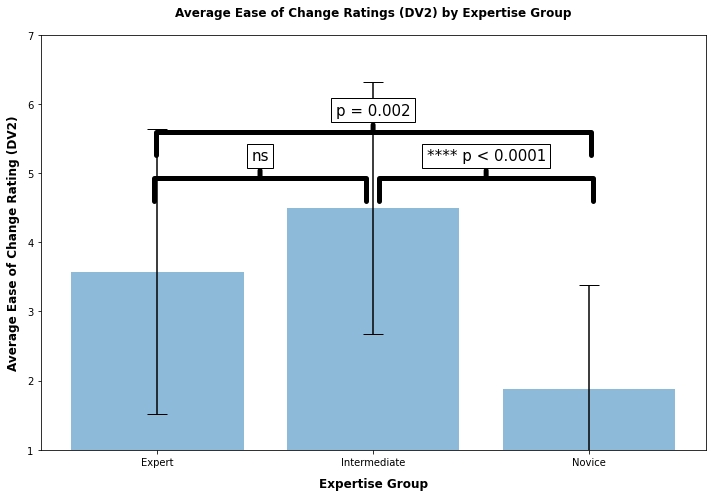

In [92]:
Groups = ["Expert", "Intermediate", 'Novice']
y_vals_ex2 = Expert_DV2[('mean', "DV2")]
std_ex2 = Expert_DV2[('std', "DV2")]
 
# Figure Size
fig, ax = plt.subplots(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(Groups, y_vals_ex2, yerr=std_ex2, color='tab:blue', align='center', alpha=0.5, ecolor='black', capsize=10)

ax.set_ylabel('Average Ease of Change Rating (DV2)', fontsize=12, labelpad=7, fontweight ='bold')
ax.set_xlabel("Expertise Group", fontsize=12, labelpad=10, fontweight ='bold')
ax.set_title('Average Ease of Change Ratings (DV2) by Expertise Group', x=0.5, y=1.03, fontweight ='bold')
ax.set_ylim([1, 7])

#annotations
ax.annotate('p = 0.002', xy=(0.5, 0.76), xytext=(0.5, 0.80), xycoords='axes fraction', 
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=14.5, lengthB=1.5', facecolor='blue', lw=5.0))

ax.annotate('**** p < 0.0001', xy=(0.67, 0.65), xytext=(0.67, 0.69), xycoords='axes fraction',
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=7.15, lengthB=1.5', facecolor='blue', lw=5.0))

ax.annotate('ns', xy=(0.33, 0.65), xytext=(0.33, 0.69), xycoords='axes fraction',
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=7.05, lengthB=1.5', facecolor='blue', lw=5.0))

#Save Plot
plt.tight_layout()
plt.savefig('Average DV2_Expertise Group_NoOut_June20.png', format='png')

# Show Plot
plt.show()


FEATURE

Significant main effect of feature F(1.51, 22.64) = 4.81, p = 0.026. Corrected for violation of sphericity violation using GG, ε = 0.755. 

Similar pattern to DV1, Bass (M = 4.11, sd = 1.99) and Soprano (M = 3.09, sd = 2.06), but post-hoc Tuckey HSD revealed however that none of these were signficant. 

In [93]:
Table_Feature_DV2

,mean,std
,DV2,DV2
Feature,,
Bass,4.111111,1.993099
Schema,3.769444,2.125736
Soprano,3.097222,2.064736


Multiple Regression: Predicting DV2

Multiple linear regression was used to test if Sonata_Section, Feature, Modulation Type, Expertise Group or DV1 significantly predicted DV2 (ease of change ratings). 

Model fitted was _______________

Multiple regression was signficiant, adjusted R2 = 0.394, F(7, 196) = 19.9, p < 0.0001
         
It was found that Feature (soprano) (β = -0.559) , p = 0.049), Intermediate (β = 1.21, p = 0.0000254), Novice (β = -0.775, p = 0.02), and DV1 (β = 0.345, p = 0.0000000520) significantly predicted DV2. 

It was found that Sonata Section (Recap) (β = -0.242, p = 0.282), Feature (Schema) (β = -0.152, p = 0.582), and Mod Type (Romanesca) (β = 0.208, p = 0.361) did not significantly predict DV2. 

## 7. Biographical and Summary Statistics

In [94]:
df_DV1_long.Random_IDs.value_counts().shape

(18,)

In [95]:
df_DV1_long.Random_IDs.unique()

array([913, 834, 719, 862, 686, 998, 473, 895, 326, 381, 268, 883, 475,
       392, 244, 148, 701, 540], dtype=int64)

In [96]:
df_DV1_long.columns

Index(['Random_IDs', 'Sonata_Section', 'Feature', 'Mod_Type', 'DV',
       'Education_Level', 'Years_Theory', 'Years_Skills', 'Schemata_Expertise',
       'Excerpt_Familiarity', 'Excerpt_Analysis', 'Solfege_Hearing',
       'Schema_Hearing', 'Perfect_Pitch?', 'Interpretation_App',
       'Expertise_Group', 'Expertise_Group_solf', 'Sonata_Order', 'Expo_Order',
       'Expo_Bass_Order', 'Expo_Sop_Order', 'Expo_Schema_Order', 'Recap_Order',
       'Recap_Bass_Order', 'Recap_Sop_Order', 'Recap_Schema_Order'],
      dtype='object')

In [97]:
df_DV2_long.shape

(108, 25)

In [98]:
df_DV1_long.Education_Level.value_counts()/12

Professor                  9.0
Graduate Student           6.0
Postdoctoral Researcher    2.0
Other, please specify:     1.0
Name: Education_Level, dtype: float64

Verfying Expertise Groups (category and hearing)

In [99]:
Expertise_groups_verification = pd.pivot_table(data=df_DV1_long, index=["Expertise_Group"], values=["Solfege_Hearing", 'Schema_Hearing'], aggfunc=['mean','std'])

Expertise_groups_verification

mean                            std                
                Schema_Hearing Solfege_Hearing Schema_Hearing Solfege_Hearing
Expertise_Group                                                              
Expert                6.380000        6.640000       1.105426        0.462565
Intermediate          4.855556        6.011111       1.101684        0.651861
Novice                1.250000        5.500000       0.437595        1.515873

In [100]:
df_DV1_long.Expertise_Group.value_counts()/12

Intermediate    9.0
Expert          5.0
Novice          4.0
Name: Expertise_Group, dtype: float64

In [101]:
Expertise_groups_verification.columns

MultiIndex([('mean',  'Schema_Hearing'),
            ('mean', 'Solfege_Hearing'),
            ( 'std',  'Schema_Hearing'),
            ( 'std', 'Solfege_Hearing')],
           )

In [102]:
df_all = pd.read_csv('DV1_June20.csv')

df_all

,Unnamed: 0,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
0,0,913,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Completely unfamiliar,...,Expert,2,5,1,1,2,3,1,1,2
1,1,834,Exposition,Bass,Romanesca,5.1,Graduate Student,5-10 years,5-10 years,Familiar,...,Intermediate,1,3,2,2,2,1,2,2,1
2,2,719,Exposition,Bass,Romanesca,6.5,Graduate Student,1-2 years,3-5 years,Somewhat familiar,...,Intermediate,2,3,2,2,1,6,2,1,1
3,3,862,Exposition,Bass,Romanesca,4.6,Graduate Student,5-10 years,5-10 years,Very familiar,...,Intermediate,1,3,1,1,1,3,1,2,2
4,4,686,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Very familiar,...,Expert,2,1,2,1,1,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,14,392,Recapitulation,Schema,Prinner,4.5,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",...,Expert,1,1,1,2,2,1,1,2,2
224,15,244,Recapitulation,Schema,Prinner,7.0,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",...,Expert,2,1,2,1,1,2,2,2,1
225,16,148,Recapitulation,Schema,Prinner,6.0,Professor,10 + years,10 + years,Somewhat familiar,...,Intermediate,1,5,2,1,1,4,1,1,1
226,17,701,Recapitulation,Schema,Prinner,7.0,Graduate Student,10 + years,10 + years,Very familiar,...,Intermediate,2,3,1,2,2,6,1,2,2


In [103]:
Expertise_groups_verification_all = pd.pivot_table(data=df_all, index=["Expertise_Group"], values=["Solfege_Hearing", 'Schema_Hearing'], aggfunc=['mean','std'])

Expertise_groups_verification_all

mean                            std                
                Schema_Hearing Solfege_Hearing Schema_Hearing Solfege_Hearing
Expertise_Group                                                              
Expert                6.483333        6.700000       1.034204        0.442782
Intermediate          4.855556        6.011111       1.101684        0.651861
Novice                1.250000        5.500000       0.437595        1.515873

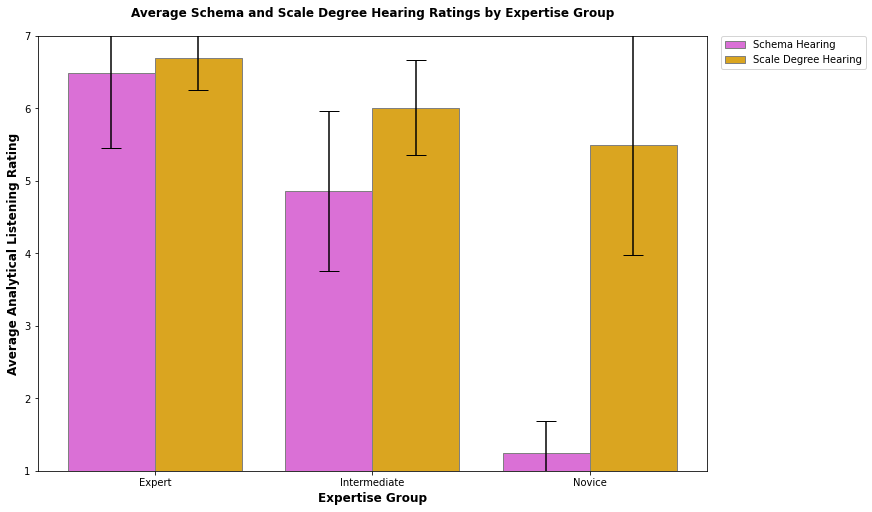

In [104]:
barWidth = 0.4
fig, ax = plt.subplots(figsize =(12, 8))

# set height of bar
SCH = Expertise_groups_verification_all.loc[['Expert', 'Intermediate', "Novice"], [('mean', "Schema_Hearing")]].squeeze()
SOL = Expertise_groups_verification_all.loc[['Expert', 'Intermediate', "Novice"], [('mean', "Solfege_Hearing")]].squeeze()


#stds
SCH_std = Expertise_groups_verification_all.loc[['Expert', 'Intermediate', "Novice"], [('std', "Schema_Hearing")]].squeeze()
SOL_std = Expertise_groups_verification_all.loc[['Expert', 'Intermediate', "Novice"], [('std', "Solfege_Hearing")]].squeeze()
 
# Set position of bar on X axis
br1_v = np.arange(len(Prin_m))
br2_v = [x + barWidth for x in br1_fm]
br3_v = [x + barWidth for x in br2_fm]
 
# Make the plot
plt.bar(br1_v, SCH, yerr=SCH_std, ecolor='black', capsize=10, color ='orchid', width = barWidth,
        edgecolor ='grey', label ='Schema Hearing')
plt.bar(br2_v, SOL, yerr=SOL_std, ecolor='black', capsize=10, color ='goldenrod', width = barWidth,
        edgecolor ='grey', label ='Scale Degree Hearing')

# Adding Xticks
plt.xlabel('Expertise Group',fontweight ='bold', fontsize = 12)
plt.ylabel('Average Analytical Listening Rating', fontweight ='bold', fontsize = 12)
plt.xticks([r + (barWidth*0.5) for r in range(len(Prin_m))],
        ['Expert', 'Intermediate', "Novice"])

ax.set_title('Average Schema and Scale Degree Hearing Ratings by Expertise Group', x=0.5, y=1.03, 
             fontweight ='bold')

ax.set_ylim([1, 7])

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('Expertise Verification_NoOut.png', format='png', pad_inches=0.5, bbox_inches='tight')

plt.show()


In [105]:
df_DV1_long.Schemata_Expertise.value_counts()/12

Somewhat familiar                                        5.0
Very familiar                                            5.0
I am an expert (analysis, playing, composition, etc.)    4.0
Completely unfamiliar                                    2.0
Familiar                                                 2.0
Name: Schemata_Expertise, dtype: float64

In [106]:
df_DV1_long.Expertise_Group.value_counts()/12

Intermediate    9.0
Expert          5.0
Novice          4.0
Name: Expertise_Group, dtype: float64

In [107]:
group_test = pd.pivot_table(data=df_DV1_long, values='Schema_Hearing', index=['Expertise_Group', 'Random_IDs', 'Schemata_Expertise'])
group_test

Schema_Hearing
Expertise_Group Random_IDs Schemata_Expertise                                                
Expert          244        I am an expert (analysis, playing, composition,...             7.0
                392        I am an expert (analysis, playing, composition,...             4.2
                475        I am an expert (analysis, playing, composition,...             7.0
                540        I am an expert (analysis, playing, composition,...             7.0
                701        Very familiar                                                  6.7
Intermediate    148        Somewhat familiar                                              4.0
                268        Very familiar                                                  5.5
                326        Familiar                                                       4.0
                473        Somewhat familiar                                              5.1
                686        Very familiar                                                  7.0
                719        Somewhat familiar                                              4.5
                834        Familiar                                                       5.7
                862        Very familiar                                                  4.9
                883        Very familiar                                                  3.0
Novice          381        Somewhat familiar                                              1.0
                895        Completely unfamiliar                                          1.0
                913        Completely unfamiliar                                          1.0
                998        Somewhat familiar                                              2.0

In [108]:
df_int = df_DV1_long[df_DV1_long["Expertise_Group"] == 'Intermediate']

vals = pd.pivot_table(data=df_int, values='Schema_Hearing', index=['Schemata_Expertise'], aggfunc=['mean', 'std'])

vals

,mean,std
,Schema_Hearing,Schema_Hearing
Schemata_Expertise,,
Familiar,4.850000,0.868282
Somewhat familiar,4.533333,0.456070
Very familiar,5.100000,1.448697


In [109]:
df_nov = df_DV1_long[df_DV1_long["Expertise_Group"] == 'Novice']

vals2 = pd.pivot_table(data=df_nov, values='Schema_Hearing', index=['Schemata_Expertise'], aggfunc=['mean', 'std'])

vals2

,mean,std
,Schema_Hearing,Schema_Hearing
Schemata_Expertise,,
Completely unfamiliar,1.0,0.000000
Somewhat familiar,1.5,0.510754


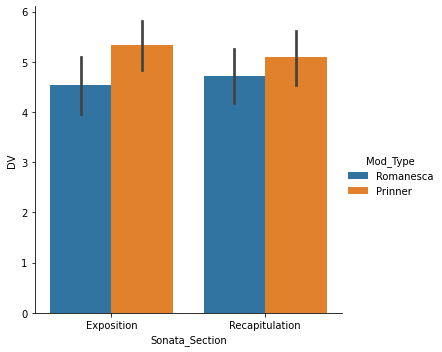

In [110]:
sns.catplot(data=df_DV1_long, y='DV', x='Sonata_Section', hue="Mod_Type", kind='bar')

Those with perfect pitch

In [111]:
vals = df_DV1_long.loc[:, ['Expertise_Group', 'Perfect_Pitch?']]

vals.value_counts()/12

#who = vals[vals['Perfect_Pitch?'] == "Yes"]

#who


Expertise_Group  Perfect_Pitch?
Intermediate     No                9.0
Expert           No                3.0
Novice           No                3.0
Expert           Yes               2.0
Novice           Yes               1.0
dtype: float64

In [112]:
df_DV1_long.columns

Index(['Random_IDs', 'Sonata_Section', 'Feature', 'Mod_Type', 'DV',
       'Education_Level', 'Years_Theory', 'Years_Skills', 'Schemata_Expertise',
       'Excerpt_Familiarity', 'Excerpt_Analysis', 'Solfege_Hearing',
       'Schema_Hearing', 'Perfect_Pitch?', 'Interpretation_App',
       'Expertise_Group', 'Expertise_Group_solf', 'Sonata_Order', 'Expo_Order',
       'Expo_Bass_Order', 'Expo_Sop_Order', 'Expo_Schema_Order', 'Recap_Order',
       'Recap_Bass_Order', 'Recap_Sop_Order', 'Recap_Schema_Order'],
      dtype='object')

Interpretation Techniques Most Used

In [113]:
Interpretations = df_DV1_long.loc[:, ['Expertise_Group', 'Interpretation_App']]

Interpretations

,Expertise_Group,Interpretation_App
Index,,
0,Novice,"I have no idea, I could just hear it!,I imagin..."
1,Intermediate,I imagined scale degrees or solfege as I listened
2,Intermediate,I imagined scale degrees or solfege as I liste...
3,Intermediate,I imagined scale degrees or solfege as I liste...
4,Intermediate,I imagined scale degrees or solfege as I liste...
...,...,...
14,Expert,"I have no idea, I could just hear it!"
15,Expert,I imagined scale degrees or solfege as I liste...
16,Intermediate,I imagined scale degrees or solfege as I liste...


In [114]:
responses = [val.strip() for sublist in Interpretations.Interpretation_App.str.split(",").tolist() for val in sublist]

responses

['I have no idea',
 'I could just hear it!',
 'I imagined scale degrees or solfege as I listened',
 'I imagined or sung/spoke the interpretation between listenings',
 'I imagined scale degrees or solfege as I listened',
 'I imagined scale degrees or solfege as I listened',
 'I sang or spoke (without scale degrees or solfege)',
 'I imagined scale degrees or solfege as I listened',
 'I subvocalized (silent rehearsal',
 'spoken or sung) scale degrees or solfege while listening',
 'I imagined scale degrees or solfege as I listened',
 'I subvocalized (silent rehearsal',
 'spoken or sung) scale degrees or solfege while listening',
 'I imagined scale degrees or solfege as I listened',
 'I subvocalized (silent rehearsal',
 'spoken or sung) scale degrees or solfege while listening',
 'I sang or spoke (without scale degrees or solfege)',
 'I spoke or sang scale degrees or solfege while listening',
 'I have no idea',
 'I could just hear it!',
 'I imagined scale degrees or solfege as I listened',


In [115]:
res = {}

for i in responses:
    res[i] = responses.count(i)/12
    
print(res)

{'I have no idea': 4.0, 'I could just hear it!': 4.0, 'I imagined scale degrees or solfege as I listened': 13.0, 'I imagined or sung/spoke the interpretation between listenings': 4.0, 'I sang or spoke (without scale degrees or solfege)': 4.0, 'I subvocalized (silent rehearsal': 8.0, 'spoken or sung) scale degrees or solfege while listening': 8.0, 'I spoke or sang scale degrees or solfege while listening': 6.0, 'I played an instrument': 3.0, 'Other (please specify)': 1.0}


In [116]:
#Same, but by Expertise Group
Expert = Interpretations[Interpretations['Expertise_Group'] == 'Expert']
Intermediate = Interpretations[Interpretations['Expertise_Group'] == 'Intermediate']
Novice = Interpretations[Interpretations['Expertise_Group'] == 'Novice']

Novice

,Expertise_Group,Interpretation_App
Index,,
0,Novice,"I have no idea, I could just hear it!,I imagin..."
6,Novice,I imagined scale degrees or solfege as I liste...
8,Novice,"I have no idea, I could just hear it!,I imagin..."
10,Novice,I imagined scale degrees or solfege as I liste...
0,Novice,"I have no idea, I could just hear it!,I imagin..."
6,Novice,I imagined scale degrees or solfege as I liste...
8,Novice,"I have no idea, I could just hear it!,I imagin..."
10,Novice,I imagined scale degrees or solfege as I liste...
0,Novice,"I have no idea, I could just hear it!,I imagin..."


In [117]:
responses_Ex = [val.strip() for sublist in Expert.Interpretation_App.str.split(",").tolist() for val in sublist]

responses_Int = [val.strip() for sublist in Intermediate.Interpretation_App.str.split(",").tolist() for val in sublist]

responses_Nov = [val.strip() for sublist in Novice.Interpretation_App.str.split(",").tolist() for val in sublist]

In [118]:
def discovery(x):
    listy = {}
    for i in x:
        listy[i] = x.count(i)/12
    return listy

ExpertD = discovery(responses_Ex)
IntermediateD = discovery(responses_Int)
NoviceD = discovery(responses_Nov)

In [119]:
ExpertD

{'Other (please specify)': 1.0,
 'I have no idea': 1.0,
 'I could just hear it!': 1.0,
 'I imagined scale degrees or solfege as I listened': 3.0,
 'I subvocalized (silent rehearsal': 2.0,
 'spoken or sung) scale degrees or solfege while listening': 2.0,
 'I sang or spoke (without scale degrees or solfege)': 1.0,
 'I played an instrument': 2.0,
 'I spoke or sang scale degrees or solfege while listening': 1.0,
 'I imagined or sung/spoke the interpretation between listenings': 1.0}

In [120]:
IntermediateD

{'I imagined scale degrees or solfege as I listened': 6.0,
 'I sang or spoke (without scale degrees or solfege)': 1.0,
 'I subvocalized (silent rehearsal': 4.0,
 'spoken or sung) scale degrees or solfege while listening': 4.0,
 'I spoke or sang scale degrees or solfege while listening': 4.0,
 'I have no idea': 1.0,
 'I could just hear it!': 1.0,
 'I played an instrument': 1.0,
 'I imagined or sung/spoke the interpretation between listenings': 1.0}

In [121]:
NoviceD

{'I have no idea': 2.0,
 'I could just hear it!': 2.0,
 'I imagined scale degrees or solfege as I listened': 4.0,
 'I imagined or sung/spoke the interpretation between listenings': 2.0,
 'I subvocalized (silent rehearsal': 2.0,
 'spoken or sung) scale degrees or solfege while listening': 2.0,
 'I sang or spoke (without scale degrees or solfege)': 2.0,
 'I spoke or sang scale degrees or solfege while listening': 1.0}

Expert Group Three way (nonsig)

In [122]:
Expert_only = df_DV1_long[df_DV1_long['Expertise_Group'] == 'Expert']

Expert = pd.pivot_table(data=Expert_only, values="DV", index=['Feature', 'Mod_Type'], aggfunc=['mean', 'std'])

Expert

mean       std
                     DV        DV
Feature Mod_Type                 
Bass    Prinner    6.52  1.234504
        Romanesca  5.11  1.665633
Schema  Prinner    6.75  0.790569
        Romanesca  2.68  1.591505
Soprano Prinner    5.46  2.011743
        Romanesca  4.28  2.303041

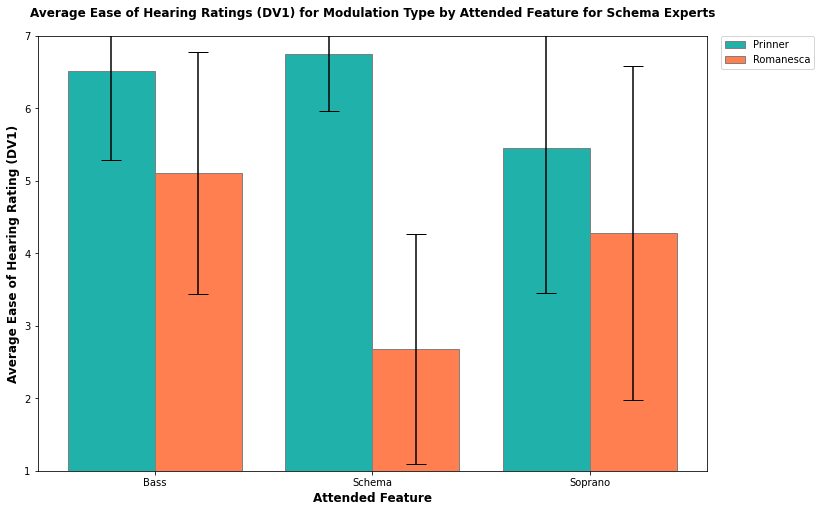

In [123]:
barWidth = 0.4
fig, ax = plt.subplots(figsize =(12, 8))

# set height of bar
Prin_mEx = Expert.loc[[('Bass', 'Prinner'), ('Schema', 'Prinner'), ('Soprano','Prinner')], [('mean', "DV")]].squeeze()
Rom_mEx = Expert.loc[[('Bass', 'Romanesca'), ('Schema', 'Romanesca'), ('Soprano','Romanesca')], [('mean', "DV")]].squeeze()

#stds
Prin_mEx_std = Expert.loc[[('Bass', 'Prinner'), ('Schema', 'Prinner'), ('Soprano','Prinner')], [('std', "DV")]].squeeze()
Rom_mEx_std = Expert.loc[[('Bass', 'Romanesca'), ('Schema', 'Romanesca'), ('Soprano','Romanesca')], [('std', "DV")]].squeeze()

 
# Set position of bar on X axis
br1_fm_Ex = np.arange(len(Prin_mEx))
br2_fm_Ex = [x + barWidth for x in br1_fm_Ex]
br3_fm_Ex = [x + barWidth for x in br2_fm_Ex]
 
# Make the plot
plt.bar(br1_fm_Ex, Prin_mEx, yerr=Prin_mEx_std, ecolor='black', capsize=10, color ='lightseagreen', width = barWidth,
        edgecolor ='grey', label ='Prinner')
plt.bar(br2_fm_Ex, Rom_mEx, yerr=Rom_mEx_std, ecolor='black', capsize=10, color ='coral', width = barWidth,
        edgecolor ='grey', label ='Romanesca')

# Adding Xticks
plt.xlabel('Attended Feature',fontweight ='bold', fontsize = 12)
plt.ylabel('Average Ease of Hearing Rating (DV1)', fontweight ='bold', fontsize = 12)
plt.xticks([r + (barWidth*0.5) for r in range(len(Prin_mEx))],
        ['Bass', 'Schema', "Soprano"])
ax.set_title('Average Ease of Hearing Ratings (DV1) for Modulation Type by Attended Feature for Schema Experts', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])



plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('Average DV1_Mod by Feature_ExpertGroup_NoOut_June20.png', format='png', pad_inches=0.5, bbox_inches='tight')

plt.show()

## 7. Familiarity Analysis

In [124]:
df_familiar = pd.read_csv('Both_DVs_NoOut_Familiar_June20.csv')

#df_familiar = df_familiar.astype({"Expertise_Group":'category', "Excerpt_Familiarity":'category', "Sonata_Section":'category',
                                 #"Feature":'category', "Mod_Type":'category'})

df_familiar.Excerpt_Analysis.unique()


array(['No, not at all', 'Yes, somewhat'], dtype=object)

In [131]:
from pandas.api.types import CategoricalDtype

cat_type1 = CategoricalDtype(categories=['Novice','Intermediate', 'Expert'], ordered=True)
cat_type2 = CategoricalDtype(categories=['Low','Medium', 'High' ], ordered=True)
cat_type3 = CategoricalDtype(categories=['No, not at all', 'Yes, somewhat'], ordered=True)
df_familiar["Expertise_Group"] = df_familiar["Expertise_Group"].astype(cat_type1)
df_familiar["Familiarity_Cat"] = df_familiar["Familiarity_Cat"].astype(cat_type2)
df_familiar["Excerpt_Analysis"] = df_familiar["Excerpt_Analysis"].astype(cat_type3)

df_familiar['Familiarity_Cat'].dtype

CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True)

In [132]:
bool_ana1 = (df_familiar["Excerpt_Analysis"] == 'Yes, somewhat')
bool_ana2 = (df_familiar["Excerpt_Analysis"] == 'No, not at all')

df_familiar.loc[bool_ana1, "Analysis_Numeric"] = 2
df_familiar.loc[bool_ana2, "Analysis_Numeric"] = 1

df_familiar

,Unnamed: 0,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,DV2,Excerpt_Familiarity,Excerpt_Analysis,Expertise_Group,Familiarity_Cat,Familiarity_Numeric,Expertise_Numeric,Analysis_Numeric
0,0,148,Exposition,Bass,Romanesca,7.0,7.0,I have heard this before,"No, not at all",Intermediate,Medium,2.0,2.0,1.0
1,1,148,Exposition,Bass,Prinner,7.0,7.0,I have heard this before,"No, not at all",Intermediate,Medium,2.0,2.0,1.0
2,2,148,Exposition,Schema,Romanesca,7.0,4.0,I have heard this before,"No, not at all",Intermediate,Medium,2.0,2.0,1.0
3,3,148,Exposition,Schema,Prinner,4.0,4.0,I have heard this before,"No, not at all",Intermediate,Medium,2.0,2.0,1.0
4,4,148,Exposition,Soprano,Romanesca,5.5,2.1,I have heard this before,"No, not at all",Intermediate,Medium,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,223,998,Recapitulation,Bass,Prinner,3.0,1.0,This was the first time I have heard this,"No, not at all",Novice,Low,1.0,1.0,1.0
212,224,998,Recapitulation,Schema,Romanesca,4.0,2.0,This was the first time I have heard this,"No, not at all",Novice,Low,1.0,1.0,1.0
213,225,998,Recapitulation,Schema,Prinner,4.0,2.0,This was the first time I have heard this,"No, not at all",Novice,Low,1.0,1.0,1.0
214,226,998,Recapitulation,Soprano,Romanesca,4.0,1.0,This was the first time I have heard this,"No, not at all",Novice,Low,1.0,1.0,1.0


In [133]:
df_familiar.dtypes

Unnamed: 0                int64
Random_IDs                int64
Sonata_Section           object
Feature                  object
Mod_Type                 object
DV                      float64
DV2                     float64
Excerpt_Familiarity    category
Excerpt_Analysis       category
Expertise_Group        category
Familiarity_Cat        category
Familiarity_Numeric     float64
Expertise_Numeric       float64
Analysis_Numeric        float64
dtype: object

In [134]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

mod_prob = OrderedModel(df_familiar['Expertise_Group'],
                        df_familiar[['Familiarity_Numeric']],
                        distr='probit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()


Optimization terminated successfully.
         Current function value: 0.874386
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:        Expertise_Group   Log-Likelihood:                -188.87
Model:                   OrderedModel   AIC:                             383.7
Method:            Maximum Likelihood   BIC:                             393.9
Date:                Fri, 24 Jun 2022                                         
Time:                        10:20:15                                         
No. Observations:                 216                                         
Df Residuals:                     213                                         
Df Model:                           3                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Familiarity_Numeric     0.9310      0.118      7.873      0.000       0.699       1.163
Novice/Intermediate     0.7376      0.208      3.538      0.000       0.329       1.146
Intermediate/Expert     0.5417      0.084      6.419      0.000       0.376       0.707
=======================================================================================
"""

In [135]:
predicted = res_prob.model.predict(res_prob.params, exog=df_familiar[['Familiarity_Numeric', "Analysis_Numeric"]])
predicted

ValueError: matrices are not aligned

In [136]:
modf_logit = OrderedModel.from_formula("Expertise_Group ~ Excerpt_Familiarity", df_familiar,
                                      distr='logit')
resf_logit = modf_logit.fit(method='bfgs')
resf_logit.summary()



Optimization terminated successfully.
         Current function value: 0.852297
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:        Expertise_Group   Log-Likelihood:                -184.10
Model:                   OrderedModel   AIC:                             376.2
Method:            Maximum Likelihood   BIC:                             389.7
Date:                Fri, 24 Jun 2022                                         
Time:                        10:20:27                                         
No. Observations:                 216                                         
Df Residuals:                     212                                         
Df Model:                           4                                         
=============================================================================================================================
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Excerpt_Familiarity[T.I have heard this before]               2.8542      0.376      7.588      0.000       2.117       3.591
Excerpt_Familiarity[T.I am very familiar with this piece]     1.3995      0.594      2.358      0.018       0.236       2.563
Novice/Intermediate                                          -0.1750      0.210     -0.832      0.405      -0.587       0.237
Intermediate/Expert                                           1.1471      0.099     11.604      0.000       0.953       1.341
=============================================================================================================================
"""

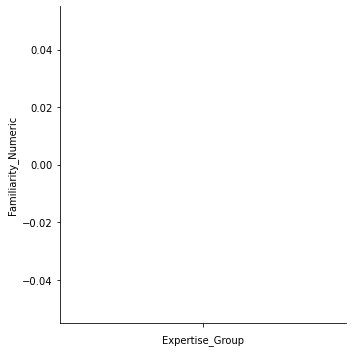

In [138]:
sns.catplot(data=df_familiar, x='Expertise_Group', y='Familiarity_Numeric', order=[''])

In [139]:
ex = (df_familiar[df_familiar['Expertise_Group']=='Expert'])

ex.Excerpt_Familiarity.value_counts()/12

I have heard this before                     5.0
This was the first time I have heard this    0.0
I am very familiar with this piece           0.0
Name: Excerpt_Familiarity, dtype: float64

In [140]:
df_familiar.Excerpt_Analysis.value_counts()/12

No, not at all    14.0
Yes, somewhat      4.0
Name: Excerpt_Analysis, dtype: float64

In [141]:
ex_gr = df_familiar.groupby(by='Expertise_Group')

ex_gr.Excerpt_Familiarity.value_counts()/12

Expertise_Group                                           
Novice           This was the first time I have heard this    3.0
                 I have heard this before                     1.0
                 I am very familiar with this piece           0.0
Intermediate     This was the first time I have heard this    4.0
                 I have heard this before                     4.0
                 I am very familiar with this piece           1.0
Expert           I have heard this before                     5.0
                 This was the first time I have heard this    0.0
                 I am very familiar with this piece           0.0
Name: Excerpt_Familiarity, dtype: float64

In [142]:
ex_gr.Excerpt_Analysis.value_counts()/12

Expertise_Group                
Novice           No, not at all    4.0
                 Yes, somewhat     0.0
Intermediate     No, not at all    7.0
                 Yes, somewhat     2.0
Expert           No, not at all    3.0
                 Yes, somewhat     2.0
Name: Excerpt_Analysis, dtype: float64